# Import Libraries

# PD MODEL MONITORING


## Background:

Assuming a year has past after developing a PD model and the peole applying 
for loan are different from the data used to train the develop and model, then we need to re assess if the model is working well.

Lets keep in mind that if the pop (past data)used to develop and train the model is different from the present data being use to run the model, the result can be disaterous.If it happens, then we need to redevelop the model.

The process of process of accesing your model in light of new data is called model maintenance.model maintenance isscheduled for every 6 months 

Alternatively, when the bank assume new data points or observation of say over  10,000 or 50,000 then its good to redevelop the model

### Population Stability Index

In order to compare past and present data in order to justify whether to
 re-develop your model, we use popilation stability index (PSI)

Main focus of PSI is to determin whether there ae difference in the two data so as to call for model redevelopment.

Present data = Actual

Past Data (original pop) = Expected

In order to know the PSI =

 Sum[( Actual Data % - Expected Data %) * log(%actual/ % expected)]


PSI = 0:  No difference btn two data

PSI<0.1 =    Little to no difference

0.1<psi<0.25 :  PSI little diff (no action )

PSI >0.25 : big difence , re-build model

PSI = Absolute Difference, rebuild model - 

In [1]:
import numpy as np
import pandas as pd

# Import Data

In [2]:
# Import Train and Test Data.
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None)

In [3]:
# Here we import the new data.
loan_data_backup = pd.read_csv('loan_2019.csv')

C:\Users\kwaku\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Explore Data

In [4]:
loan_data = loan_data_backup.copy()

In [5]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [6]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN       2500         2500           2500.0   36 months   
1 NaN        NaN      30000        30000          30000.0   60 months   
2 NaN        NaN       5000         5000           5000.0   36 months   
3 NaN        NaN       4000         4000           4000.0   36 months   
4 NaN        NaN      30000        30000          30000.0   60 months   

   int_rate  installment grade sub_grade       emp_title emp_length  \
0     13.56        84.92     C        C1            Chef  10+ years   
1     18.94       777.23     D        D2     Postmaster   10+ years   
2     17.97       180.69     D        D1  Administrative    6 years   
3     18.94       146.51     D        D2   IT Supervisor  10+ years   
4     16.14       731.78     C        C4        Mechanic  10+ years   

  home_ownership  annual_inc verification_status issue_d loan_status  \
0           RENT     55000.0        Not Verified  Dec-18     Current   
1       MORTGAGE     90000.0     Source Verified  Dec-18     Current   
2       MORTGAGE     59280.0     Source Verified  Dec-18     Current   
3       MORTGAGE     92000.0     Source Verified  Dec-18     Current   
4       MORTGAGE     57250.0        Not Verified  Dec-18     Current   

  pymnt_plan  url  desc             purpose               title zip_code  \
0          n  NaN   NaN  debt_consolidation  Debt consolidation    109xx   
1          n  NaN   NaN  debt_consolidation  Debt consolidation    713xx   
2          n  NaN   NaN  debt_consolidation  Debt consolidation    490xx   
3          n  NaN   NaN  debt_consolidation  Debt consolidation    985xx   
4          n  NaN   NaN  debt_consolidation  Debt consolidation    212xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  \
0         NY  18.24            0           Apr-01               1   
1         LA  26.52            0           Jun-87               0   
2         MI  10.51            0           Apr-11               0   
3         WA  16.74            0           Feb-06               0   
4         MD  26.35            0           Dec-00               0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                    45.0         9        1   
1                    71.0                    75.0        13        1   
2                     NaN                     NaN         8        0   
3                     NaN                     NaN        10        0   
4                     NaN                     NaN        12        0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0       4341        10.3         34                   w    2386.02   
1      12315        24.2         44                   w   29387.75   
2       4599        19.1         13                   w    4787.21   
3       5468        78.1         13                   w    3831.93   
4        829         3.6         26                   w   29339.02   

   out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0        2386.02       167.02           167.02           113.98   
1       29387.75      1507.11          1507.11           612.25   
2        4787.21       353.89           353.89           212.79   
3        3831.93       286.71           286.71           168.07   
4       29339.02      1423.21          1423.21           660.98   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0          53.04                 0.0         0.0                      0.0   
1         894.86                 0.0         0.0                      0.0   
2         141.10                 0.0         0.0                      0.0   
3         118.64                 0.0         0.0                      0.0   
4         762.23                 0.0         0.0                      0.0   

  last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  \
0       Feb-19            84.92       Mar-19 

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415736 entries, 0 to 415735
Columns: 145 entries, id to settlement_term
dtypes: float64(59), int64(51), object(35)
memory usage: 459.9+ MB


***

# Population Stability Index: Preprocessing

### >>> The code from here to the other line starting with '>>>' is copied from the Data Preparation notebook, with minor adjustments. We have to perform the exact same data preprocessing, fine-classing, and coarse classing on the new data, in order to be able to calculate statistics for the exact same variables to the ones we used for training and testing the PD model.

### Preprocessing few continuous variables

## General Preprocessing

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [10]:
type(loan_data['emp_length_int'][0])

str

In [11]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [12]:
type(loan_data['emp_length_int'][0])

numpy.float64

Earliest credit line

In [13]:
loan_data['earliest_cr_line']

0         Apr-01
1         Jun-87
2         Apr-11
3         Feb-06
4         Dec-00
5         Sep-02
6         Nov-04
7         Nov-97
8         Aug-98
9         Apr-02
10        May-07
11        Dec-03
12        Jun-03
13        Oct-08
14        Jul-90
15        Dec-88
16        Dec-02
17        Oct-10
18        Jul-05
19        Feb-01
20        Dec-04
21        Oct-01
22        Sep-03
23        Oct-04
24        Sep-10
25        Oct-99
26        May-07
27        Feb-97
28        Jan-95
29        Aug-05
           ...  
415706    Feb-12
415707    Nov-87
415708    Aug-99
415709    Jun-13
415710    Sep-97
415711    Sep-05
415712    Apr-07
415713    Jun-06
415714    Sep-99
415715    Jun-03
415716    Jun-07
415717    Jul-96
415718    Jun-99
415719    Sep-83
415720    Feb-01
415721    Apr-13
415722    Jul-08
415723    Feb-03
415724    Jun-08
415725    Jun-08
415726    Sep-97
415727    Feb-15
415728    Jan-04
415729    Jun-12
415730    Mar-06
415731    Mar-03
415732    Apr-01
415733    Nov-

In [14]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [15]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [16]:
pd.to_datetime('2018-12-01') - loan_data['earliest_cr_line_date']

0         6453 days
1        11506 days
2         2801 days
3         4686 days
4         6574 days
5         5935 days
6         5143 days
7         7700 days
8         7427 days
9         6088 days
10        4232 days
11        5479 days
12        5662 days
13        3713 days
14       10380 days
15       10957 days
16        5844 days
17        2983 days
18        4901 days
19        6512 days
20        5113 days
21        6270 days
22        5570 days
23        5174 days
24        3013 days
25        7001 days
26        4232 days
27        7973 days
28        8735 days
29        4870 days
            ...    
415706    2495 days
415707   11353 days
415708    7062 days
415709    2009 days
415710    7761 days
415711    4839 days
415712    4262 days
415713    4566 days
415714    7031 days
415715    5662 days
415716    4201 days
415717    8188 days
415718    7123 days
415719   12875 days
415720    6512 days
415721    2070 days
415722    3805 days
415723    5782 days
415724    3835 days


In [17]:
# Assume we are now in December 2017
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [18]:
loan_data['mths_since_earliest_cr_line'].describe()
# Dates from 1969 and before are not being converted well, i.e., they have become 2069 and similar, and negative differences are being calculated.

count    415736.000000
mean        195.026255
std          97.748338
min        -600.000000
25%         137.000000
50%         177.000000
75%         242.000000
max         599.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [19]:
# There are 2303 such values.
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
2315             Nov-65            2065-11-01                       -563.0
4289             Nov-68            2068-11-01                       -599.0
5128             Apr-62            2062-04-01                       -520.0
5284             May-61            2061-05-01                       -509.0
6147             Jul-67            2067-07-01                       -583.0
6819             Jun-67            2067-06-01                       -582.0
8974             May-64            2064-05-01                       -545.0
9567             May-65            2065-05-01                       -557.0
10118            Jan-67            2067-01-01                       -577.0
10576            Jun-65            2065-06-01                       -558.0
12026            Dec-68            2068-12-01                       -600.0
12262            Feb-66            2066-02-01                       -566.0
12350            Apr-63            2063-04-01                       -532.0
13000            Jan-54            2054-01-01                       -421.0
15122            Jan-68            2068-01-01                       -589.0
15161            Feb-66            2066-02-01                       -566.0
16098            Jul-68            2068-07-01                       -595.0
16216            Jan-50            2050-01-01                       -373.0
17765            Jul-50            2050-07-01                       -379.0
17925            Apr-68            2068-04-01                       -592.0
18063            Jan-63            2063-01-01                       -529.0
18304            Nov-66            2066-11-01                       -575.0
18805            Dec-67            2067-12-01                       -588.0
19068            Aug-66            2066-08-01                       -572.0
19558            Sep-64            2064-09-01                       -549.0
20006            Jan-58            2058-01-01                       -469.0
20056            Apr-63            2063-04-01                       -532.0
20543            Feb-63            2063-02-01                       -530.0
20583            Aug-67            2067-08-01                       -584.0
20890            Oct-65            2065-10-01                       -562.0
...                 ...                   ...                          ...
400295           Aug-64            2064-08-01                       -548.0
400569           Apr-65            2065-04-01                       -556.0
401795           Apr-65            2065-04-01                       -556.0
402011           Apr-63            2063-04-01                       -532.0
402015           Apr-65            2065-04-01                       -556.0
402113           Mar-68            2068-03-01                       -591.0
403463           Aug-68            2068-08-01                       -596.0
404054           Jun-67            2067-06-01                       -582.0
405543           Nov-66            2066-11-01                       -575.0
405691           Sep-67            2067-09-01                       -585.0
407817           Feb-67            2067-02-01                       -578.0
408323           Aug-68            2068-08-01                       -596.0
408477           Mar-65            2065-03-01                       -555.0
409332           Oct-68            2068-10-01                       -598.0
409576           Jan-59            2059-01-01                       -481.0
409803           Sep-68            2068-09-01                       -597.0
410693           Jan-67            2067-01-01                       -577.0
411327           Jan-65            2065-01-01                       -553.0
412063           Jan-62            2062-01-01                       -517.0
412064           Oct-67            2067-10-01                       -586.0
412237           Dec-68            2068-12-01                       -600.0
412571           Mar-62         

In [20]:
# We set all these negative differences to the maximum.
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
min(loan_data['mths_since_earliest_cr_line'])

37.0

Term

In [22]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
5          36 months
6          36 months
7          36 months
8          36 months
9          36 months
10         36 months
11         60 months
12         36 months
13         36 months
14         60 months
15         36 months
16         36 months
17         60 months
18         60 months
19         60 months
20         36 months
21         36 months
22         36 months
23         36 months
24         60 months
25         60 months
26         36 months
27         60 months
28         36 months
29         60 months
             ...    
415706     36 months
415707     36 months
415708     36 months
415709     36 months
415710     36 months
415711     36 months
415712     60 months
415713     36 months
415714     36 months
415715     36 months
415716     60 months
415717     36 months
415718     36 months
415719     36 months
415720     36 months
415721     36 months
415722     36

In [23]:
loan_data['term'].describe()

count         415736
unique             2
top        36 months
freq          288989
Name: term, dtype: object

In [24]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [25]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
5          36
6          36
7          36
8          36
9          36
10         36
11         60
12         36
13         36
14         60
15         36
16         36
17         60
18         60
19         60
20         36
21         36
22         36
23         36
24         60
25         60
26         36
27         60
28         36
29         60
         ... 
415706     36
415707     36
415708     36
415709     36
415710     36
415711     36
415712     60
415713     36
415714     36
415715     36
415716     60
415717     36
415718     36
415719     36
415720     36
415721     36
415722     36
415723     36
415724     36
415725     60
415726     60
415727     36
415728     36
415729     60
415730     60
415731     36
415732     36
415733     36
415734     36
415735     36
Name: term_int, Length: 415736, dtype: object

In [26]:
type(loan_data['term_int'])
type(loan_data['term_int'][25])

str

In [27]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
5         36
6         36
7         36
8         36
9         36
10        36
11        60
12        36
13        36
14        60
15        36
16        36
17        60
18        60
19        60
20        36
21        36
22        36
23        36
24        60
25        60
26        36
27        60
28        36
29        60
          ..
415706    36
415707    36
415708    36
415709    36
415710    36
415711    36
415712    60
415713    36
415714    36
415715    36
415716    60
415717    36
415718    36
415719    36
415720    36
415721    36
415722    36
415723    36
415724    36
415725    60
415726    60
415727    36
415728    36
415729    60
415730    60
415731    36
415732    36
415733    36
415734    36
415735    36
Name: term_int, Length: 415736, dtype: int64

In [28]:
type(loan_data['term_int'][0])

numpy.int64

Time since the loan was funded

In [29]:
loan_data['issue_d']

0         Dec-18
1         Dec-18
2         Dec-18
3         Dec-18
4         Dec-18
5         Dec-18
6         Dec-18
7         Dec-18
8         Dec-18
9         Dec-18
10        Dec-18
11        Dec-18
12        Dec-18
13        Dec-18
14        Dec-18
15        Dec-18
16        Dec-18
17        Dec-18
18        Dec-18
19        Dec-18
20        Dec-18
21        Dec-18
22        Dec-18
23        Dec-18
24        Dec-18
25        Dec-18
26        Dec-18
27        Dec-18
28        Dec-18
29        Dec-18
           ...  
415706    Mar-18
415707    Mar-18
415708    Mar-18
415709    Mar-18
415710    Mar-18
415711    Mar-18
415712    Mar-18
415713    Mar-18
415714    Mar-18
415715    Mar-18
415716    Mar-18
415717    Mar-18
415718    Mar-18
415719    Mar-18
415720    Mar-18
415721    Mar-18
415722    Mar-18
415723    Mar-18
415724    Mar-18
415725    Mar-18
415726    Mar-18
415727    Mar-18
415728    Mar-18
415729    Mar-18
415730    Mar-18
415731    Mar-18
415732    Mar-18
415733    Mar-

In [30]:
# Assume we are now in December 2017
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2018-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
loan_data['mths_since_issue_d'].describe()

count    415736.000000
mean          4.386060
std           2.776119
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max           9.000000
Name: mths_since_issue_d, dtype: float64

# Data preparation: preprocessing discrete variables

In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415736 entries, 0 to 415735
Columns: 151 entries, id to mths_since_issue_d
dtypes: datetime64[ns](2), float64(62), int64(52), object(35)
memory usage: 478.9+ MB


In [32]:
# loan_data['grade_factor'] = loan_data['grade'].astype('category')

In [33]:
#grade
#sub_grade
#home_ownership
#verification_status
#loan_status
#purpose
#addr_state
#initial_list_status

In [34]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        0        1        0        0        0        0
1             0        0        0        1        0        0        0
2             0        0        0        1        0        0        0
3             0        0        0        1        0        0        0
4             0        0        1        0        0        0        0
5             0        0        1        0        0        0        0
6             0        0        0        1        0        0        0
7             0        0        1        0        0        0        0
8             0        0        0        1        0        0        0
9             0        0        1        0        0        0        0
10            0        0        0        1        0        0        0
11            0        1        0        0        0        0        0
12            1        0        0        0        0        0        0
13            0        0        0        1        0        0        0
14            0        1        0        0        0        0        0
15            0        0        1        0        0        0        0
16            0        1        0        0        0        0        0
17            0        0        1        0        0        0        0
18            0        0        0        1        0        0        0
19            0        0        1        0        0        0        0
20            0        0        1        0        0        0        0
21            0        0        1        0        0        0        0
22            0        0        0        0        1        0        0
23            0        0        0        1        0        0        0
24            0        0        0        0        1        0        0
25            0        0        1        0        0        0        0
26            0        0        0        0        1        0        0
27            0        0        0        1        0        0        0
28            0        0        0        0        1        0        0
29            0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
415706        0        0        1        0        0        0        0
415707        1        0        0        0        0        0        0
415708        0        1        0        0        0        0        0
415709        0        0        1        0        0        0        0
415710        0        0        1        0        0        0        0
415711        0        0        0        1        0        0        0
415712        0        1        0        0        0        0        0
415713        0        0        1        0        0        0        0
415714        1        0        0        0        0        0        0
415715        1        0        0        0        0        0        0
415716        0        0        0        0        0        1        0
415717        0        1        0        0        0        0        0
415718        0        0        0        0        1        0        0
415719        0        0        1        0        0        0        0
415720        0        0        1        0        0        0        0
415721        0        0        1        0        0        0        0
415722        1        0        0        0        0        0        0
415723        0        0        1        0        0        0        0
415724        1        0        0        0        0        0        0
415725        0        1        0        0        0        0        0
415726        0        0        0        0        1        0        0
415727        0        0        0        1        0        0        0
415728        0        0        0        1        0        0        0
415729        1        0        0        0        0        0        0
415730        1        0        0        0        0        0        0
415731        0   

In [35]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [36]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [37]:
loan_data_dummies.shape

(415736, 121)

In [38]:
loan_data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415736 entries, 0 to 415735
Columns: 121 entries, grade:A to initial_list_status:w
dtypes: uint8(121)
memory usage: 48.0 MB


In [39]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [40]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

# Data preparation: check for missing values and clean

In [41]:
loan_data.isnull()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv   term  \
0       True       True      False        False            False  False   
1       True       True      False        False            False  False   
2       True       True      False        False            False  False   
3       True       True      False        False            False  False   
4       True       True      False        False            False  False   
5       True       True      False        False            False  False   
6       True       True      False        False            False  False   
7       True       True      False        False            False  False   
8       True       True      False        False            False  False   
9       True       True      False        False            False  False   
10      True       True      False        False            False  False   
11      True       True      False        False            False  False   
12      True       True      False        False            False  False   
13      True       True      False        False            False  False   
14      True       True      False        False            False  False   
15      True       True      False        False            False  False   
16      True       True      False        False            False  False   
17      True       True      False        False            False  False   
18      True       True      False        False            False  False   
19      True       True      False        False            False  False   
20      True       True      False        False            False  False   
21      True       True      False        False            False  False   
22      True       True      False        False            False  False   
23      True       True      False        False            False  False   
24      True       True      False        False            False  False   
25      True       True      False        False            False  False   
26      True       True      False        False            False  False   
27      True       True      False        False            False  False   
28      True       True      False        False            False  False   
29      True       True      False        False            False  False   
...      ...        ...        ...          ...              ...    ...   
415706  True       True      False        False            False  False   
415707  True       True      False        False            False  False   
415708  True       True      False        False            False  False   
415709  True       True      False        False            False  False   
415710  True       True      False        False            False  False   
415711  True       True      False        False            False  False   
415712  True       True      False        False            False  False   
415713  True       True      False        False            False  False   
415714  True       True      False        False            False  False   
415715  True       True      False        False            False  False   
415716  True       True      False        False            False  False   
415717  True       True      False        False            False  False   
415718  True       True      False        False            False  False   
415719  True       True      False        False            False  False   
415720  True       True      False        False            False  False   
415721  True       True      False        False            False  False   
415722  True       True      False        False            False  False   
415723  True       True      False        False            False  False   
415724  True       True      False        False            False  False   
415725  True       True      False        False            False  False   
415726  True       True      False        False            False  False   
415727  True       True      False 

In [42]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                            415736
member_id                                     415736
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      47601
emp_length                                     35068
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [43]:
pd.options.display.max_rows = 100

In [44]:
# loan_data$total_rev_hi_lim - There are 70276 missing values here.
# 'Total revolving high credit/credit limit', so it makes sense that the missing values are equal to funded_amnt.

# loan_data$acc_now_delinq
# loan_data$total_acc
# loan_data$pub_rec
# loan_data$open_acc
# loan_data$inq_last_6mths
# loan_data$delinq_2yrs
# loan_data$mths_since_earliest_cr_line
# - There are 29 missing values in all of these columns. They are likely the same observations.
# An eyeballing examination of the dataset confirms that.
# All of these are with loan_status 'Does not meet the credit policy. Status:Fully Paid'.
# We impute these values.

# loan_data$annual_inc
# - There are 4 missing values in all of these columns.

# loan_data$mths_since_last_record
# loan_data$mths_since_last_delinq





In [45]:
# 'Total revolving high credit/credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [46]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)

In [47]:
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [48]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

# PD model: Data preparation: Good/ Bad (DV for the PD model)

In [49]:
loan_data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default'], dtype=object)

In [50]:
loan_data['loan_status'].value_counts()

Current               375566
Fully Paid             27721
Late (31-120 days)      4967
Charged Off             4072
In Grace Period         2401
Late (16-30 days)       1000
Default                    9
Name: loan_status, dtype: int64

In [51]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current               0.903376
Fully Paid            0.066679
Late (31-120 days)    0.011947
Charged Off           0.009795
In Grace Period       0.005775
Late (16-30 days)     0.002405
Default               0.000022
Name: loan_status, dtype: float64

In [52]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

In [53]:
#loan_data['good_bad'].sum()/loan_data['loan_status'].count()

In [54]:
loan_data['good_bad']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        1
45        1
46        1
47        1
48        1
49        1
         ..
415686    1
415687    1
415688    1
415689    1
415690    1
415691    1
415692    1
415693    1
415694    1
415695    1
415696    1
415697    1
415698    1
415699    0
415700    1
415701    1
415702    0
415703    1
415704    1
415705    1
415706    1
415707    1
415708    1
415709    1
415710    1
415711    1
415712    1
415713    1
415714    1
415715    1
415716    1
415717    1
4157

# PD model: Data Preparation: Splitting Data

In [55]:
# loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Here we don't split data into training and test
#train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

In [58]:
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

In [59]:
#loan_data_inputs_train.shape

In [60]:
#loan_data_targets_train.shape

In [61]:
#loan_data_inputs_test.shape

In [62]:
#loan_data_targets_test.shape

In [63]:
#loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [64]:
#loan_data_inputs_train.shape

In [65]:
#loan_data_targets_train.shape

In [66]:
#loan_data_inputs_test.shape

In [67]:
#loan_data_targets_test.shape

# PD model: Data Preparation: Discrete Variables

In [68]:
loan_data.drop('good_bad', axis = 1)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0      NaN        NaN       2500         2500           2500.0   36 months   
1      NaN        NaN      30000        30000          30000.0   60 months   
2      NaN        NaN       5000         5000           5000.0   36 months   
3      NaN        NaN       4000         4000           4000.0   36 months   
4      NaN        NaN      30000        30000          30000.0   60 months   
5      NaN        NaN       5550         5550           5550.0   36 months   
6      NaN        NaN       2000         2000           2000.0   36 months   
7      NaN        NaN       6000         6000           6000.0   36 months   
8      NaN        NaN       5000         5000           5000.0   36 months   
9      NaN        NaN       6000         6000           6000.0   36 months   
10     NaN        NaN       5500         5500           5500.0   36 months   
11     NaN        NaN      28000        28000          28000.0   60 months   
12     NaN        NaN      11200        11200          11200.0   36 months   
13     NaN        NaN       6500         6500           6500.0   36 months   
14     NaN        NaN      22000        22000          22000.0   60 months   
15     NaN        NaN       3500         3500           3500.0   36 months   
16     NaN        NaN       7000         7000           7000.0   36 months   
17     NaN        NaN      25000        25000          25000.0   60 months   
18     NaN        NaN      16000        16000          16000.0   60 months   
19     NaN        NaN      13000        13000          13000.0   60 months   
20     NaN        NaN      10000        10000          10000.0   36 months   
21     NaN        NaN      13000        13000          13000.0   36 months   
22     NaN        NaN       9600         9600           9600.0   36 months   
23     NaN        NaN       3500         3500           3500.0   36 months   
24     NaN        NaN      16000        16000          16000.0   60 months   
25     NaN        NaN      15000        15000          14975.0   60 months   
26     NaN        NaN      13000        13000          13000.0   36 months   
27     NaN        NaN      23000        23000          23000.0   60 months   
28     NaN        NaN       8000         8000           8000.0   36 months   
29     NaN        NaN      32075        32075          32075.0   60 months   
30     NaN        NaN      12000        12000          12000.0   60 months   
31     NaN        NaN      10000        10000          10000.0   60 months   
32     NaN        NaN      16000        16000          16000.0   60 months   
33     NaN        NaN       3300         3300           3300.0   36 months   
34     NaN        NaN      20000        20000          20000.0   60 months   
35     NaN        NaN       3500         3500           3500.0   36 months   
36     NaN        NaN      12000        12000          12000.0   36 months   
37     NaN        NaN      10000        10000          10000.0   36 months   
38     NaN        NaN       6000         6000           5975.0   36 months   
39     NaN        NaN      25000        25000          25000.0   60 months   
40     NaN        NaN      20000        20000          20000.0   36 months   
41     NaN        NaN       2200         2200           2200.0   36 months   
42     NaN        NaN      25000        25000          25000.0   60 months   
43     NaN        NaN       4000         4000           4000.0   36 months   
44     NaN        NaN       1250         1250           1250.0   36 months   
45     NaN        NaN      10400        10400          10400.0   36 months   
46     NaN        NaN       7500         7500           7475.0   36 months   
47     NaN        NaN       7000         7000           6975.0   36 months   
48     NaN        NaN      25000        25000          25000.0   36 months   
49     NaN        NaN       8000         8000           8000.0   36 months   
...     ..        ...        .

In [69]:
loan_data['good_bad']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        1
32        1
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        1
44        1
45        1
46        1
47        1
48        1
49        1
         ..
415686    1
415687    1
415688    1
415689    1
415690    1
415691    1
415692    1
415693    1
415694    1
415695    1
415696    1
415697    1
415698    1
415699    0
415700    1
415701    1
415702    0
415703    1
415704    1
415705    1
415706    1
415707    1
415708    1
415709    1
415710    1
415711    1
415712    1
415713    1
415714    1
415715    1
415716    1
415717    1
4157

In [70]:
#####
df_inputs_prepr = loan_data.drop('good_bad', axis = 1)
df_targets_prepr = loan_data['good_bad']
#####
#df_inputs_prepr = loan_data_inputs_test
##df_targets_prepr = loan_data_targets_test

In [71]:
df_inputs_prepr['grade'].unique()

array(['C', 'D', 'B', 'A', 'E', 'F', 'G'], dtype=object)

In [72]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

grade  good_bad
0     C         1
1     D         1
2     D         1
3     D         1
4     C         1

In [73]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

grade  good_bad
0     A    115366
1     B    117465
2     C    105588
3     D     57827
4     E     16229
5     F      2680
6     G       581

In [74]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.994470
1     B  0.984736
2     C  0.973434
3     D  0.955540
4     E  0.942264
5     F  0.910448
6     G  0.889845

In [75]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)
df1

grade  good_bad grade  good_bad
0     A    115366     A  0.994470
1     B    117465     B  0.984736
2     C    105588     C  0.973434
3     D     57827     D  0.955540
4     E     16229     E  0.942264
5     F      2680     F  0.910448
6     G       581     G  0.889845

In [76]:
df1 = df1.iloc[:, [0, 1, 3]]
df1

grade  good_bad  good_bad
0     A    115366  0.994470
1     B    117465  0.984736
2     C    105588  0.973434
3     D     57827  0.955540
4     E     16229  0.942264
5     F      2680  0.910448
6     G       581  0.889845

In [77]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

grade   n_obs  prop_good
0     A  115366   0.994470
1     B  117465   0.984736
2     C  105588   0.973434
3     D   57827   0.955540
4     E   16229   0.942264
5     F    2680   0.910448
6     G     581   0.889845

In [78]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

grade   n_obs  prop_good  prop_n_obs
0     A  115366   0.994470    0.277498
1     B  117465   0.984736    0.282547
2     C  105588   0.973434    0.253978
3     D   57827   0.955540    0.139095
4     E   16229   0.942264    0.039037
5     F    2680   0.910448    0.006446
6     G     581   0.889845    0.001398

In [79]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad
0     A  115366   0.994470    0.277498  114728.0   638.0
1     B  117465   0.984736    0.282547  115672.0  1793.0
2     C  105588   0.973434    0.253978  102783.0  2805.0
3     D   57827   0.955540    0.139095   55256.0  2571.0
4     E   16229   0.942264    0.039037   15292.0   937.0
5     F    2680   0.910448    0.006446    2440.0   240.0
6     G     581   0.889845    0.001398     517.0    64.0

In [80]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     A  115366   0.994470    0.277498  114728.0   638.0     0.282103   
1     B  117465   0.984736    0.282547  115672.0  1793.0     0.284424   
2     C  105588   0.973434    0.253978  102783.0  2805.0     0.252732   
3     D   57827   0.955540    0.139095   55256.0  2571.0     0.135868   
4     E   16229   0.942264    0.039037   15292.0   937.0     0.037601   
5     F    2680   0.910448    0.006446    2440.0   240.0     0.006000   
6     G     581   0.889845    0.001398     517.0    64.0     0.001271   

   prop_n_bad  
0    0.070513  
1    0.198165  
2    0.310013  
3    0.284151  
4    0.103559  
5    0.026525  
6    0.007073

In [81]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     A  115366   0.994470    0.277498  114728.0   638.0     0.282103   
1     B  117465   0.984736    0.282547  115672.0  1793.0     0.284424   
2     C  105588   0.973434    0.253978  102783.0  2805.0     0.252732   
3     D   57827   0.955540    0.139095   55256.0  2571.0     0.135868   
4     E   16229   0.942264    0.039037   15292.0   937.0     0.037601   
5     F    2680   0.910448    0.006446    2440.0   240.0     0.006000   
6     G     581   0.889845    0.001398     517.0    64.0     0.001271   

   prop_n_bad       WoE  
0    0.070513  1.386479  
1    0.198165  0.361366  
2    0.310013 -0.204286  
3    0.284151 -0.737821  
4    0.103559 -1.013101  
5    0.026525 -1.486388  
6    0.007073 -1.716343

In [82]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     G     581   0.889845    0.001398     517.0    64.0     0.001271   
1     F    2680   0.910448    0.006446    2440.0   240.0     0.006000   
2     E   16229   0.942264    0.039037   15292.0   937.0     0.037601   
3     D   57827   0.955540    0.139095   55256.0  2571.0     0.135868   
4     C  105588   0.973434    0.253978  102783.0  2805.0     0.252732   
5     B  117465   0.984736    0.282547  115672.0  1793.0     0.284424   
6     A  115366   0.994470    0.277498  114728.0   638.0     0.282103   

   prop_n_bad       WoE  
0    0.007073 -1.716343  
1    0.026525 -1.486388  
2    0.103559 -1.013101  
3    0.284151 -0.737821  
4    0.310013 -0.204286  
5    0.198165  0.361366  
6    0.070513  1.386479

In [83]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     G     581   0.889845    0.001398     517.0    64.0     0.001271   
1     F    2680   0.910448    0.006446    2440.0   240.0     0.006000   
2     E   16229   0.942264    0.039037   15292.0   937.0     0.037601   
3     D   57827   0.955540    0.139095   55256.0  2571.0     0.135868   
4     C  105588   0.973434    0.253978  102783.0  2805.0     0.252732   
5     B  117465   0.984736    0.282547  115672.0  1793.0     0.284424   
6     A  115366   0.994470    0.277498  114728.0   638.0     0.282103   

   prop_n_bad       WoE  diff_prop_good  diff_WoE  
0    0.007073 -1.716343             NaN       NaN  
1    0.026525 -1.486388        0.020603  0.229955  
2    0.103559 -1.013101        0.031816  0.473287  
3    0.284151 -0.737821        0.013276  0.275280  
4    0.310013 -0.204286        0.017895  0.533534  
5    0.198165  0.361366        0.011301  0.565652  
6    0.070513  1.386479        0.009734  1.025113

In [84]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     G     581   0.889845    0.001398     517.0    64.0     0.001271   
1     F    2680   0.910448    0.006446    2440.0   240.0     0.006000   
2     E   16229   0.942264    0.039037   15292.0   937.0     0.037601   
3     D   57827   0.955540    0.139095   55256.0  2571.0     0.135868   
4     C  105588   0.973434    0.253978  102783.0  2805.0     0.252732   
5     B  117465   0.984736    0.282547  115672.0  1793.0     0.284424   
6     A  115366   0.994470    0.277498  114728.0   638.0     0.282103   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.007073 -1.716343             NaN       NaN  0.552934  
1    0.026525 -1.486388        0.020603  0.229955  0.552934  
2    0.103559 -1.013101        0.031816  0.473287  0.552934  
3    0.284151 -0.737821        0.013276  0.275280  0.552934  
4    0.310013 -0.204286        0.017895  0.533534  0.552934  
5    0.198165  0.361366        0.011301  0.565652  0.552934  
6    0.070513  1.386479        0.009734  1.025113  0.552934

In [85]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [86]:
# 'grade', 'home_ownership', 'verification_status',
# 'purpose', 'addr_state', 'initial_list_status'

In [87]:
# 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

grade   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0     G     581   0.889845    0.001398     517.0    64.0     0.001271   
1     F    2680   0.910448    0.006446    2440.0   240.0     0.006000   
2     E   16229   0.942264    0.039037   15292.0   937.0     0.037601   
3     D   57827   0.955540    0.139095   55256.0  2571.0     0.135868   
4     C  105588   0.973434    0.253978  102783.0  2805.0     0.252732   
5     B  117465   0.984736    0.282547  115672.0  1793.0     0.284424   
6     A  115366   0.994470    0.277498  114728.0   638.0     0.282103   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.007073 -1.716343             NaN       NaN  0.552934  
1    0.026525 -1.486388        0.020603  0.229955  0.552934  
2    0.103559 -1.013101        0.031816  0.473287  0.552934  
3    0.284151 -0.737821        0.013276  0.275280  0.552934  
4    0.310013 -0.204286        0.017895  0.533534  0.552934  
5    0.198165  0.361366        0.011301  0.565652  0.552934  
6    0.070513  1.386479        0.009734  1.025113  0.552934

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [89]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    #x = df_WoE.iloc[:, 0]
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

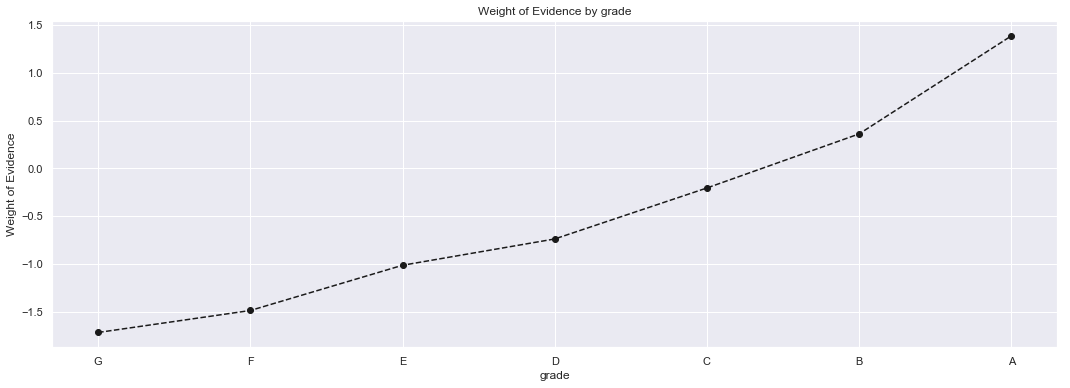

In [90]:
plot_by_woe(df_temp)

In [91]:
# Leave as is.
# 'G' will be the reference category.

In [92]:
# 'home_ownership'
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

home_ownership   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0           RENT  164446   0.974271    0.395554  160215.0  4231.0   
1            OWN   49806   0.974361    0.119802   48529.0  1277.0   
2       MORTGAGE  200999   0.982423    0.483477  197466.0  3533.0   
3            ANY     485   0.985567    0.001167     478.0     7.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.393951    0.467617 -0.171424             NaN       NaN  0.037175  
1     0.119327    0.141136 -0.167855        0.000089  0.003570  0.037175  
2     0.485547    0.390473  0.217916        0.008062  0.385771  0.037175  
3     0.001175    0.000774  0.418198        0.003144  0.200282  0.037175

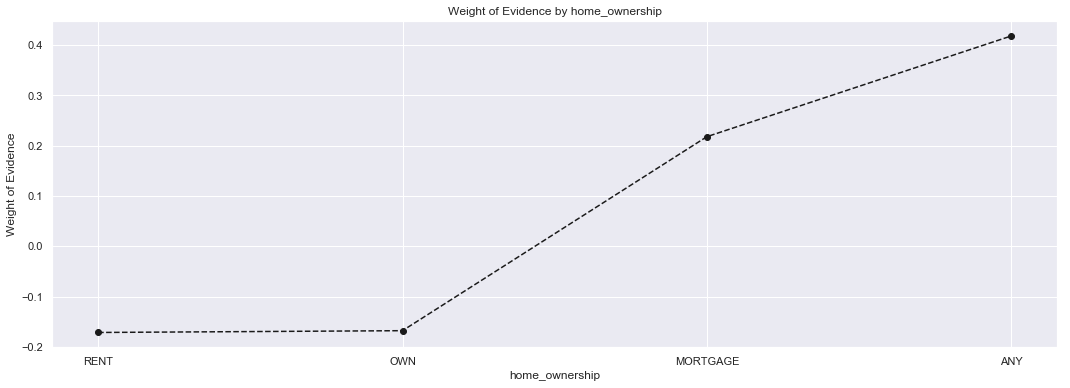

In [93]:
plot_by_woe(df_temp)

In [97]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:ANY']])
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

In [98]:
loan_data['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'ANY'], dtype=object)

In [99]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:ANY']])

In [100]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['NY', 'LA', 'MI', 'WA', 'MD', 'IN', 'IL', 'FL', 'CT', 'GA', 'UT',
       'NC', 'KY', 'OH', 'AR', 'OK', 'CA', 'WV', 'NJ', 'SC', 'TX', 'PA',
       'KS', 'AL', 'VA', 'MO', 'AZ', 'NM', 'CO', 'RI', 'WI', 'TN', 'NV',
       'MA', 'NE', 'MN', 'NH', 'OR', 'VT', 'DC', 'MS', 'ID', 'DE', 'ND',
       'HI', 'ME', 'AK', 'WY', 'MT', 'SD'], dtype=object)

In [101]:
#df_inputs_prepr['addr_state:ND'] = 0

In [102]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

In [103]:
if ['addr_state:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ID'] = 0

In [104]:
if ['addr_state:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:IA'] = 0

In [105]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          SD    830   0.968675    0.001996    804.0    26.0     0.001977   
1          AL   4674   0.971759    0.011243   4542.0   132.0     0.011168   
2          MO   6625   0.973434    0.015936   6449.0   176.0     0.015857   
3          FL  31480   0.973571    0.075721  30648.0   832.0     0.075360   
4          MS   2560   0.973828    0.006158   2493.0    67.0     0.006130   
5          HI   1766   0.973952    0.004248   1720.0    46.0     0.004229   
6          WI   5528   0.974313    0.013297   5386.0   142.0     0.013244   
7          OK   3871   0.974425    0.009311   3772.0    99.0     0.009275   
8          NV   6385   0.974471    0.015358   6222.0   163.0     0.015299   
9          NY  33363   0.974553    0.080250  32514.0   849.0     0.079948   
10         AR   3213   0.975101    0.007728   3133.0    80.0     0.007704   
11         MD  10146   0.975655    0.024405   9899.0   247.0     0.024341   
12         NC  11321   0.975886    0.027231  11048.0   273.0     0.027166   
13         CA  56372   0.975981    0.135596  55018.0  1354.0     0.135283   
14         MI  10511   0.976881    0.025283  10268.0   243.0     0.025248   
15         NE   2013   0.977149    0.004842   1967.0    46.0     0.004837   
16         MA   9413   0.977159    0.022642   9198.0   215.0     0.022617   
17         LA   4387   0.977433    0.010552   4288.0    99.0     0.010544   
18         TX  34240   0.977775    0.082360  33479.0   761.0     0.082321   
19         PA  13529   0.978047    0.032542  13232.0   297.0     0.032536   
20         AZ  10308   0.978172    0.024795  10083.0   225.0     0.024793   
21         MN   6733   0.978316    0.016195   6587.0   146.0     0.016197   
22         NM   2135   0.979391    0.005135   2091.0    44.0     0.005142   
23         NH   2090   0.979426    0.005027   2047.0    43.0     0.005033   
24         GA  13724   0.979525    0.033011  13443.0   281.0     0.033055   
25         DC    834   0.979616    0.002006    817.0    17.0     0.002009   
26         IN   7000   0.979857    0.016838   6859.0   141.0     0.016866   
27         UT   2644   0.979955    0.006360   2591.0    53.0     0.006371   
28         TN   6851   0.980587    0.016479   6718.0   133.0     0.016519   
29         CO   9285   0.981260    0.022334   9111.0   174.0     0.022403   
30         NJ  14927   0.981376    0.035905  14649.0   278.0     0.036020   
31         VA  10840   0.981734    0.026074  10642.0   198.0     0.026167   
32         SC   5323   0.982529    0.012804   5230.0    93.0     0.012860   
33         MT   1095   0.982648    0.002634   1076.0    19.0     0.002646   
34         RI   1912   0.982741    0.004599   1879.0    33.0     0.004620   
35         KY   4075   0.982822    0.009802   4005.0    70.0     0.009848   
36         OR   5074   0.982854    0.012205   4987.0    87.0     0.012262   
37         DE   1229   0.982913    0.002956   1208.0    21.0     0.002970   
38         WA   8612   0.983395    0.020715   8469.0   143.0     0.020824   
39         IL  16594   0.984332    0.039915  16334.0   260.0     0.040163   
40         ID   1472   0.984375    0.003541   1449.0    23.0     0.003563   
41         CT   6742   0.984426    0.016217   6637.0   105.0     0.016320   
42         OH  13549   0.985460    0.032590  13352.0   197.0     0.032831   
43         AK    843   0.985765    0.002028    831.0    12.0     0.002043   
44         KS   3349   0.985966    0.008056   3302.0    47.0     0.008119   
45         ND    869   0.986191    0.002090    857.0    12.0     0.002107   
46         WY    772   0.989637    0.001857    764.0     8.0     0.001879   
47         VT    966   0.989648    0.002324    956.0    10.0     0.002351   
48         WV   2309   0.991338    0.005554   2289.0    20.0     0.005628   
49         ME   1353   0.994087    0.003254   1345.0     8.0     0.003307   

    prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.0028

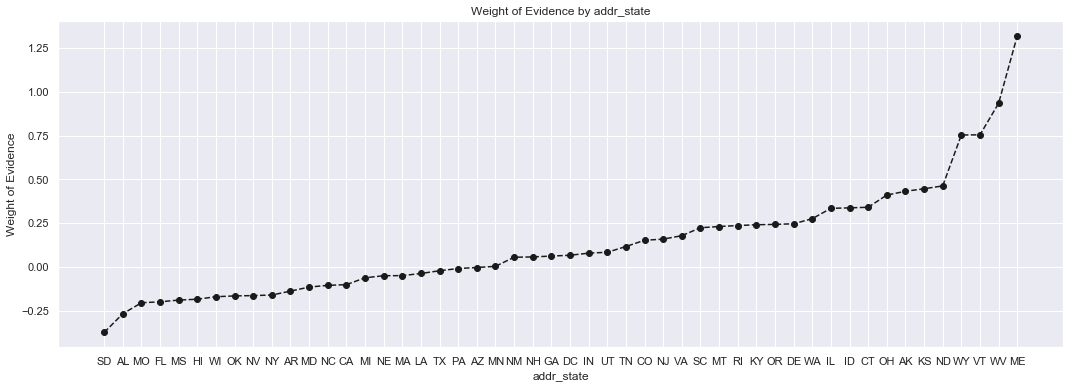

In [106]:
plot_by_woe(df_temp)

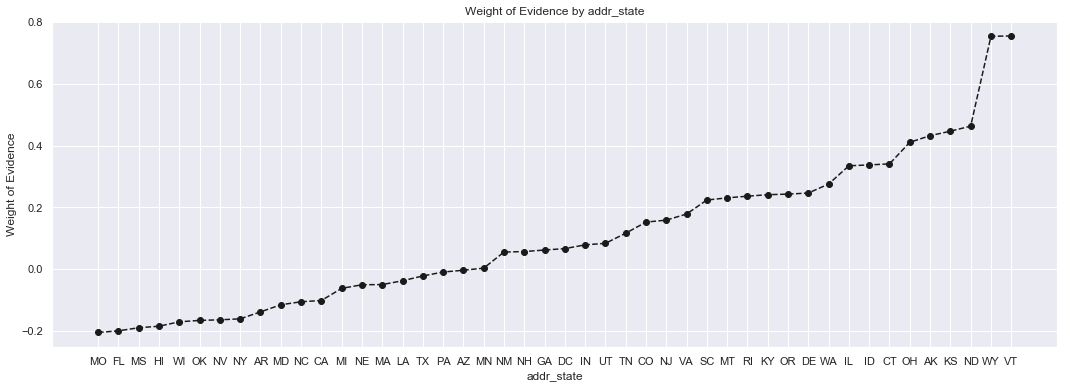

In [107]:
plot_by_woe(df_temp.iloc[2: -2, : ])

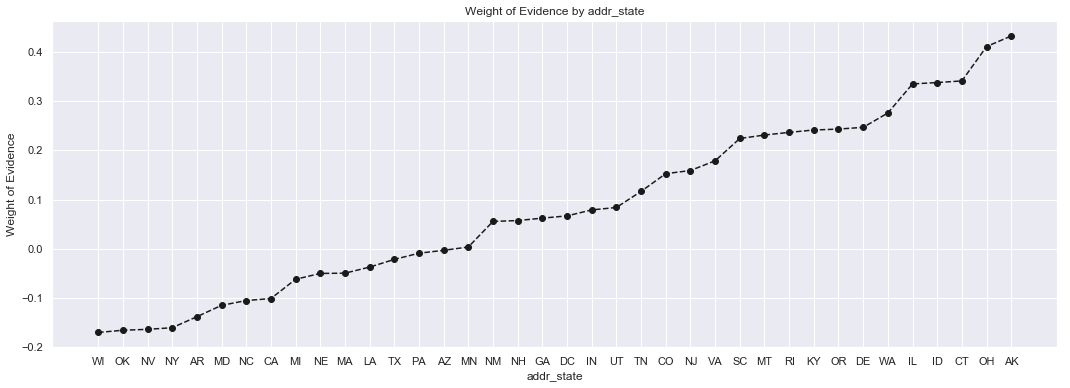

In [108]:
plot_by_woe(df_temp.iloc[6: -6, : ])

In [109]:
df_inputs_prepr.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [110]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [111]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

verification_status   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0            Verified   81007   0.966410    0.194852   78286.0  2721.0   
1     Source Verified  165810   0.977287    0.398835  162044.0  3766.0   
2        Not Verified  168919   0.984839    0.406313  166358.0  2561.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.192496    0.300729 -0.446133             NaN       NaN  0.095464  
1     0.398448    0.416225 -0.043648        0.010877  0.402485  0.095464  
2     0.409056    0.283046  0.368242        0.007552  0.411890  0.095464

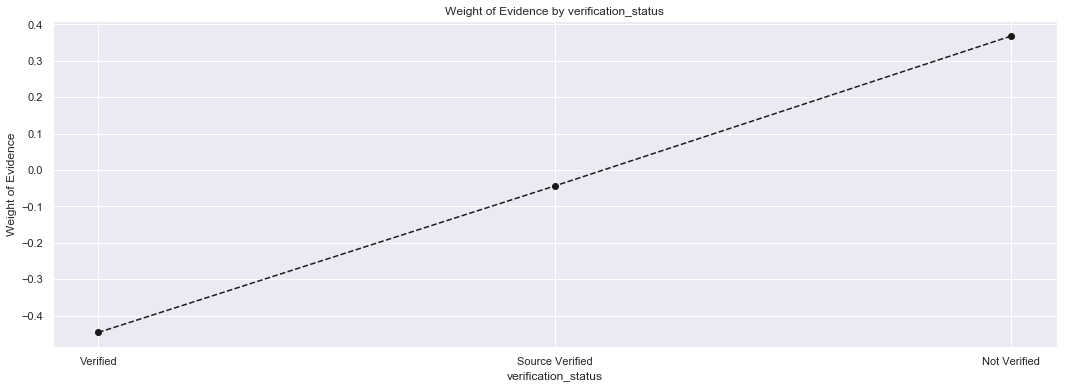

In [112]:
plot_by_woe(df_temp)

In [113]:
# Leave as is.
# 'Verified' will be the reference category.

In [114]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

purpose   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0       small_business    3560   0.950843    0.008563    3385.0   175.0   
1                house    4302   0.959089    0.010348    4126.0   176.0   
2               moving    2574   0.959984    0.006191    2471.0   103.0   
3              medical    5344   0.961826    0.012854    5140.0   204.0   
4       major_purchase    9242   0.963211    0.022230    8902.0   340.0   
5                other   27881   0.965496    0.067064   26919.0   962.0   
6             vacation    2982   0.967471    0.007173    2885.0    97.0   
7     renewable_energy     229   0.973799    0.000551     223.0     6.0   
8                  car    4017   0.974857    0.009662    3916.0   101.0   
9     home_improvement   27292   0.975414    0.065647   26621.0   671.0   
10  debt_consolidation  218867   0.978608    0.526457  214185.0  4682.0   
11         credit_card  109445   0.986011    0.263256  107914.0  1531.0   
12             wedding       1   1.000000    0.000002       1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.008323    0.019341 -0.843179             NaN       NaN  inf  
1      0.010145    0.019452 -0.650923        0.008246  0.192256  inf  
2      0.006076    0.011384 -0.627853        0.000896  0.023070  inf  
3      0.012639    0.022546 -0.578814        0.001842  0.049039  inf  
4      0.021889    0.037577 -0.540417        0.001385  0.038397  inf  
5      0.066191    0.106322 -0.473929        0.002285  0.066488  inf  
6      0.007094    0.010721 -0.412933        0.001975  0.060996  inf  
7      0.000548    0.000663 -0.190090        0.006328  0.222843  inf  
8      0.009629    0.011163 -0.147797        0.001058  0.042293  inf  
9      0.065458    0.074160 -0.124816        0.000557  0.022981  inf  
10     0.526657    0.517462  0.017612        0.003194  0.142428  inf  
11     0.265348    0.169209  0.449911        0.007403  0.432299  inf  
12     0.000002    0.000000       inf        0.013989       inf  inf

In [115]:
#plt.figure(figsize=(15, 5))
#sns.pointplot(x = 'purpose', y = 'WoE', data = df_temp, figsize = (5, 15))

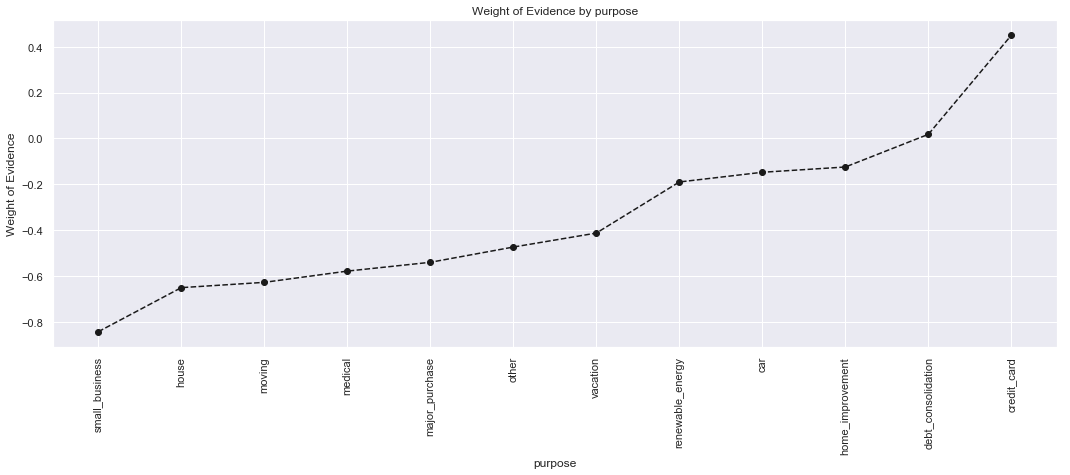

In [116]:
plot_by_woe(df_temp, 90)

In [120]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [121]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0                   f   53365   0.972398    0.128363   51892.0  1473.0   
1                   w  362371   0.979096    0.871637  354796.0  7575.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.127597    0.162798 -0.243639             NaN       NaN  0.010026  
1     0.872403    0.837202  0.041187        0.006698  0.284826  0.010026

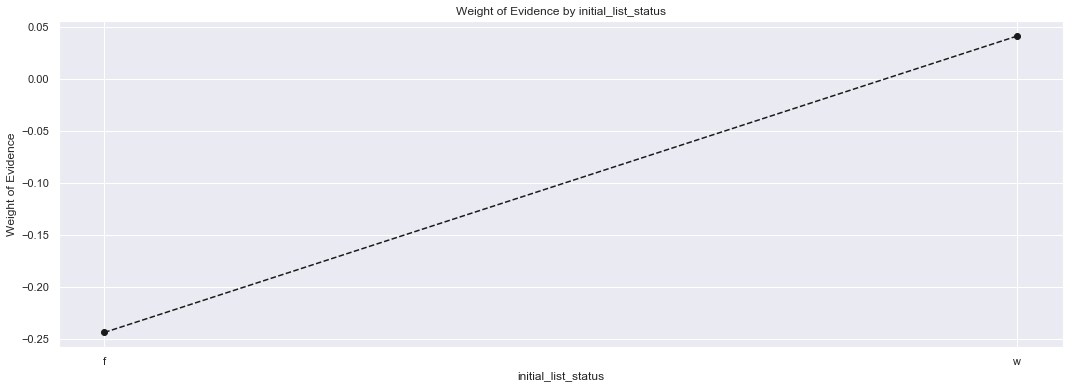

In [122]:
plot_by_woe(df_temp)

In [123]:
# Leave as is.
# 'f' will be the reference category.

# PD model: Data Preparation: Continuous Variables, Part 1

In [124]:
# WoE function for ordered discrete and continuous variables
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [125]:
# term
df_inputs_prepr['term_int'].unique()
# There are only two unique values, 36 and 60.

array([36, 60], dtype=int64)

In [126]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

term_int   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0        36  288989   0.980390    0.695126  283322.0  5667.0     0.696657   
1        60  126747   0.973325    0.304874  123366.0  3381.0     0.303343   

   prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0    0.626326  0.106422             NaN       NaN  0.02215  
1    0.373674 -0.208519        0.007065   0.31494  0.02215

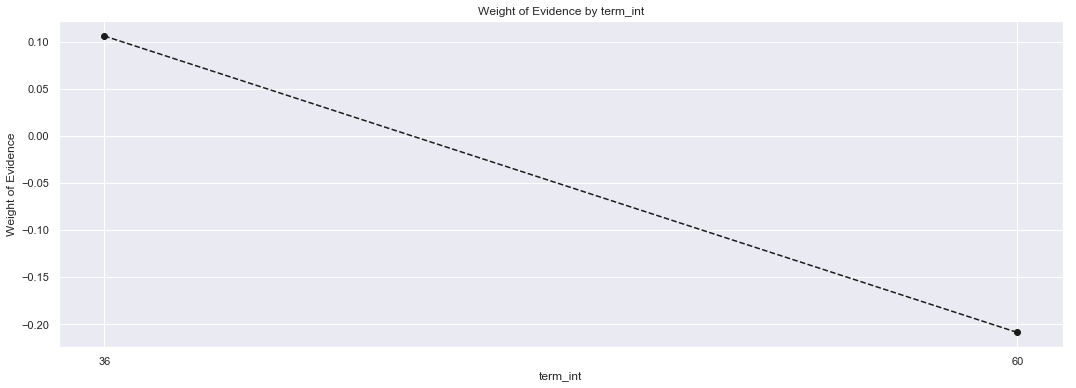

In [127]:
plot_by_woe(df_temp)

In [128]:
# Leave as is.
# '60' will be the reference category.
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [129]:
# emp_length_int
df_inputs_prepr['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([10.,  6.,  4.,  0.,  2.,  9.,  5.,  3.,  7.,  1.,  8.])

In [130]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

emp_length_int   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0              0.0   73236   0.975012    0.176160   71406.0  1830.0   
1              1.0   27927   0.975436    0.067175   27241.0   686.0   
2              2.0   37228   0.978054    0.089547   36411.0   817.0   
3              3.0   33843   0.976480    0.081405   33047.0   796.0   
4              4.0   26191   0.975908    0.062999   25560.0   631.0   
5              5.0   25799   0.978759    0.062056   25251.0   548.0   
6              6.0   18541   0.980476    0.044598   18179.0   362.0   
7              7.0   14992   0.978388    0.036061   14668.0   324.0   
8              8.0   13610   0.977663    0.032737   13306.0   304.0   
9              9.0   10262   0.979341    0.024684   10050.0   212.0   
10            10.0  134107   0.981075    0.322577  131569.0  2538.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.175579    0.202255 -0.141437             NaN       NaN  0.012911  
1      0.066983    0.075818 -0.123902        0.000424  0.017535  0.012911  
2      0.089531    0.090296 -0.008515        0.002618  0.115386  0.012911  
3      0.081259    0.087975 -0.079416        0.001575  0.070900  0.012911  
4      0.062849    0.069739 -0.104025        0.000572  0.024609  0.012911  
5      0.062089    0.060566  0.024843        0.002851  0.128868  0.012911  
6      0.044700    0.040009  0.110876        0.001717  0.086032  0.012911  
7      0.036067    0.035809  0.007177        0.002087  0.103698  0.012911  
8      0.032718    0.033599 -0.026560        0.000725  0.033737  0.012911  
9      0.024712    0.023431  0.053239        0.001678  0.079799  0.012911  
10     0.323513    0.280504  0.142652        0.001734  0.089413  0.012911

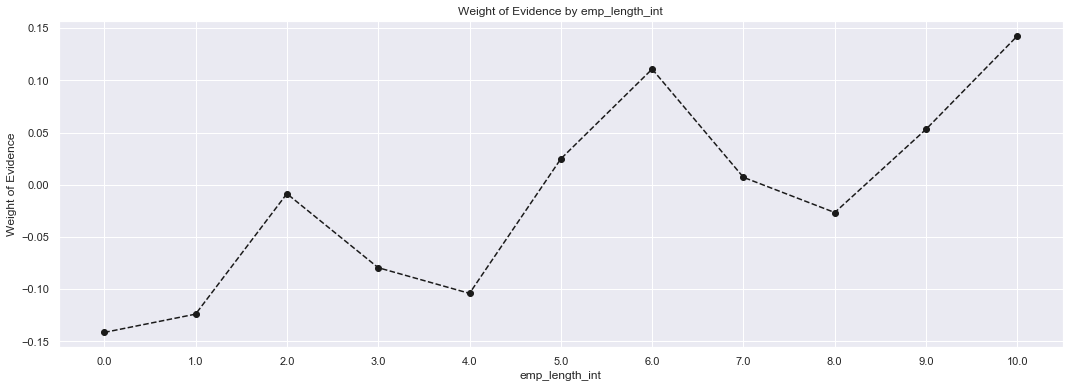

In [131]:
plot_by_woe(df_temp)

In [132]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [133]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [134]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [135]:
df_inputs_prepr['mths_since_issue_d_factor']

0         (-0.009, 0.18]
1         (-0.009, 0.18]
2         (-0.009, 0.18]
3         (-0.009, 0.18]
4         (-0.009, 0.18]
5         (-0.009, 0.18]
6         (-0.009, 0.18]
7         (-0.009, 0.18]
8         (-0.009, 0.18]
9         (-0.009, 0.18]
10        (-0.009, 0.18]
11        (-0.009, 0.18]
12        (-0.009, 0.18]
13        (-0.009, 0.18]
14        (-0.009, 0.18]
15        (-0.009, 0.18]
16        (-0.009, 0.18]
17        (-0.009, 0.18]
18        (-0.009, 0.18]
19        (-0.009, 0.18]
20        (-0.009, 0.18]
21        (-0.009, 0.18]
22        (-0.009, 0.18]
23        (-0.009, 0.18]
24        (-0.009, 0.18]
25        (-0.009, 0.18]
26        (-0.009, 0.18]
27        (-0.009, 0.18]
28        (-0.009, 0.18]
29        (-0.009, 0.18]
30        (-0.009, 0.18]
31        (-0.009, 0.18]
32        (-0.009, 0.18]
33        (-0.009, 0.18]
34        (-0.009, 0.18]
35        (-0.009, 0.18]
36        (-0.009, 0.18]
37        (-0.009, 0.18]
38        (-0.009, 0.18]
39        (-0.009, 0.18]


In [136]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0             (-0.009, 0.18]  40134   0.998530    0.096537  40075.0    59.0   
1               (0.18, 0.36]      0        NaN    0.000000      NaN     NaN   
2               (0.36, 0.54]      0        NaN    0.000000      NaN     NaN   
3               (0.54, 0.72]      0        NaN    0.000000      NaN     NaN   
4                (0.72, 0.9]      0        NaN    0.000000      NaN     NaN   
5                (0.9, 1.08]  41973   0.996140    0.100961  41811.0   162.0   
6               (1.08, 1.26]      0        NaN    0.000000      NaN     NaN   
7               (1.26, 1.44]      0        NaN    0.000000      NaN     NaN   
8               (1.44, 1.62]      0        NaN    0.000000      NaN     NaN   
9                (1.62, 1.8]      0        NaN    0.000000      NaN     NaN   
10               (1.8, 1.98]      0        NaN    0.000000      NaN     NaN   
11              (1.98, 2.16]  46305   0.993068    0.111381  45984.0   321.0   
12              (2.16, 2.34]      0        NaN    0.000000      NaN     NaN   
13              (2.34, 2.52]      0        NaN    0.000000      NaN     NaN   
14               (2.52, 2.7]      0        NaN    0.000000      NaN     NaN   
15               (2.7, 2.88]      0        NaN    0.000000      NaN     NaN   
16              (2.88, 3.06]  39026   0.988444    0.093872  38575.0   451.0   
17              (3.06, 3.24]      0        NaN    0.000000      NaN     NaN   
18              (3.24, 3.42]      0        NaN    0.000000      NaN     NaN   
19               (3.42, 3.6]      0        NaN    0.000000      NaN     NaN   
20               (3.6, 3.78]      0        NaN    0.000000      NaN     NaN   
21              (3.78, 3.96]      0        NaN    0.000000      NaN     NaN   
22              (3.96, 4.14]  46079   0.985156    0.110837  45395.0   684.0   
23              (4.14, 4.32]      0        NaN    0.000000      NaN     NaN   
24               (4.32, 4.5]      0        NaN    0.000000      NaN     NaN   
25               (4.5, 4.68]      0        NaN    0.000000      NaN     NaN   
26              (4.68, 4.86]      0        NaN    0.000000      NaN     NaN   
27              (4.86, 5.04]  43089   0.977697    0.103645  42128.0   961.0   
28              (5.04, 5.22]      0        NaN    0.000000      NaN     NaN   
29               (5.22, 5.4]      0        NaN    0.000000      NaN     NaN   
30               (5.4, 5.58]      0        NaN    0.000000      NaN     NaN   
31              (5.58, 5.76]      0        NaN    0.000000      NaN     NaN   
32              (5.76, 5.94]      0        NaN    0.000000      NaN     NaN   
33              (5.94, 6.12]  41533   0.970216    0.099902  40296.0  1237.0   
34               (6.12, 6.3]      0        NaN    0.000000      NaN     NaN   
35               (6.3, 6.48]      0        NaN    0.000000      NaN     NaN   
36              (6.48, 6.66]      0        NaN    0.000000      NaN     NaN   
37              (6.66, 6.84]      0        NaN    0.000000      NaN     NaN   
38              (6.84, 7.02]  46311   0.961003    0.111395  44505.0  1806.0   
39               (7.02, 7.2]      0        NaN    0.000000      NaN     NaN   
40               (7.2, 7.38]      0        NaN    0.000000      NaN     NaN   
41              (7.38, 7.56]      0        NaN    0.000000      NaN     NaN   
42              (7.56, 7.74]      0        NaN    0.000000      NaN     NaN   
43              (7.74, 7.92]      0        NaN    0.000000      NaN     NaN   
44               (7.92, 8.1]  42928   0.954622    0.103258  40980.0  1948.0   
45               (8.1, 8.28]      0        NaN    0.000000      NaN     NaN   
46              (8.28, 8.46]      0        NaN    0.000000      NaN     NaN   
47              (8.46, 8.64]      0        NaN    0.000000      NaN     NaN   
48              (8.64, 8.82]      0        NaN    0.000000      NaN     NaN   
49               (8.82, 9.0]  28358   0.949961    0.0

In [137]:
# !!!!!!!!!
#df_temp['mths_since_issue_d_factor'] = np.array(df_temp.mths_since_issue_d_factor.apply(str))
#df_temp['mths_since_issue_d_factor'] = list(df_temp.mths_since_issue_d_factor.apply(str))
#df_temp['mths_since_issue_d_factor'] = tuple(df_temp.mths_since_issue_d_factor.apply(str))

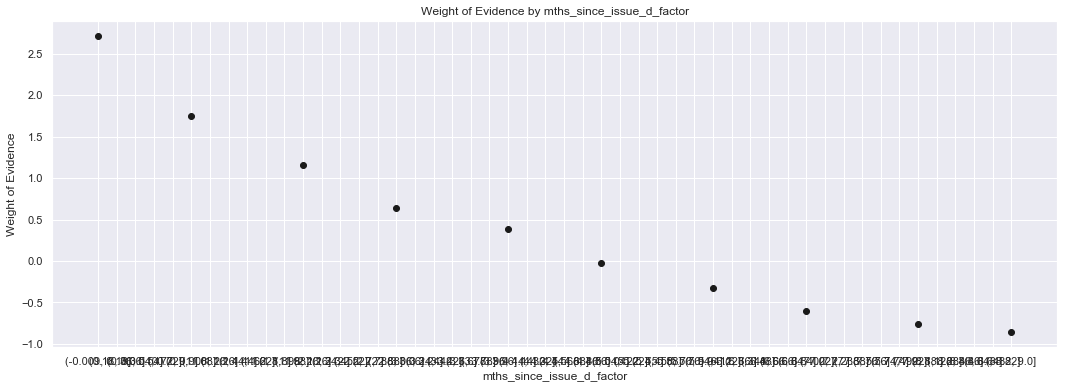

In [138]:
plot_by_woe(df_temp)

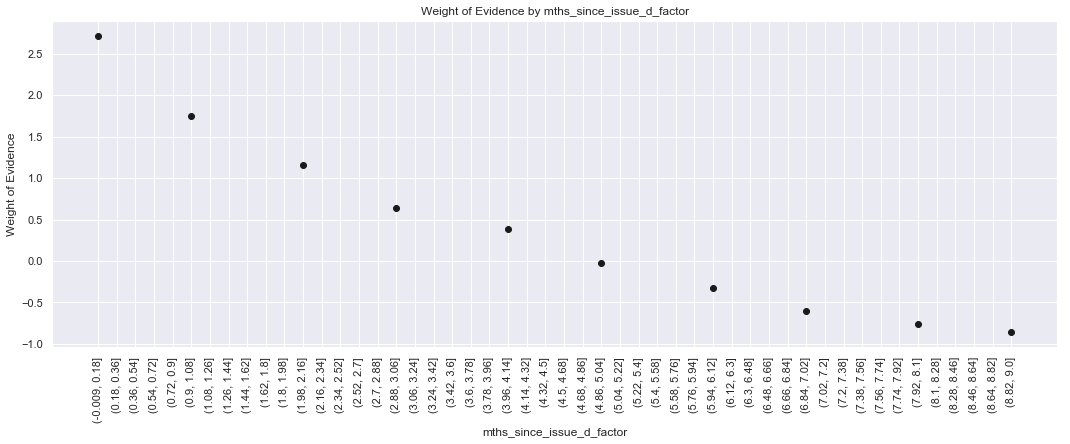

In [139]:
plot_by_woe(df_temp, 90)

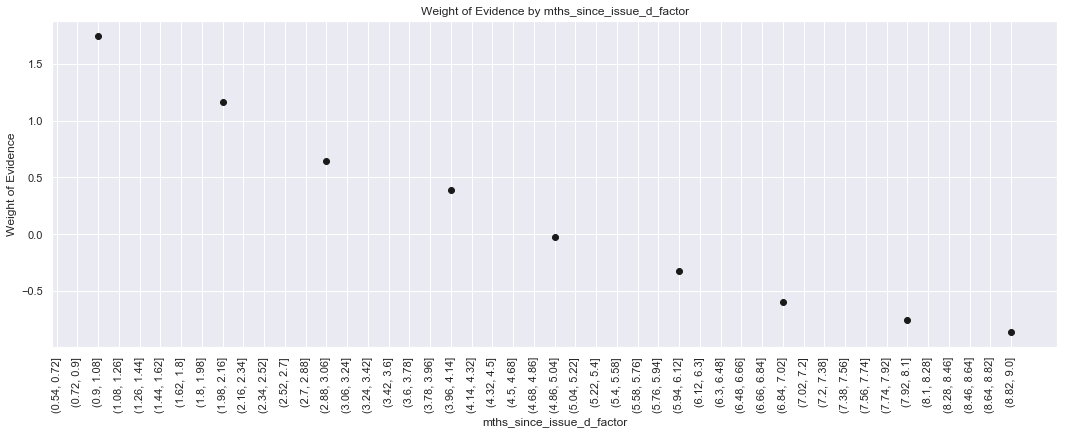

In [140]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [141]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [142]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [143]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0     (5.284, 5.824]   7921   0.994950    0.019053   7881.0   40.0   
1     (5.824, 6.337]  21368   0.995882    0.051398  21280.0   88.0   
2     (6.337, 6.851]  21308   0.995307    0.051254  21208.0  100.0   
3     (6.851, 7.364]  17625   0.992397    0.042395  17491.0  134.0   
4     (7.364, 7.878]  19116   0.995240    0.045981  19025.0   91.0   
5     (7.878, 8.392]  13382   0.989912    0.032189  13247.0  135.0   
6     (8.392, 8.905]  14697   0.996462    0.035352  14645.0   52.0   
7     (8.905, 9.419]      0        NaN    0.000000      NaN    NaN   
8     (9.419, 9.932]  15505   0.978265    0.037295  15168.0  337.0   
9    (9.932, 10.446]  21361   0.986705    0.051381  21077.0  284.0   
10   (10.446, 10.96]  23946   0.983672    0.057599  23555.0  391.0   
11   (10.96, 11.473]  15970   0.988791    0.038414  15791.0  179.0   
12  (11.473, 11.987]  22833   0.984321    0.054922  22475.0  358.0   
13    (11.987, 12.5]   4410   0.969841    0.010608   4277.0  133.0   
14    (12.5, 13.014]  19102   0.980735    0.045947  18734.0  368.0   
15  (13.014, 13.528]   4302   0.971641    0.010348   4180.0  122.0   
16  (13.528, 14.041]  22597   0.977962    0.054354  22099.0  498.0   
17  (14.041, 14.555]  20890   0.974390    0.050248  20355.0  535.0   
18  (14.555, 15.068]  17858   0.975417    0.042955  17419.0  439.0   
19  (15.068, 15.582]   3826   0.957919    0.009203   3665.0  161.0   
20  (15.582, 16.096]   4479   0.933691    0.010774   4182.0  297.0   
21  (16.096, 16.609]  14871   0.978482    0.035770  14551.0  320.0   
22  (16.609, 17.123]  11084   0.984121    0.026661  10908.0  176.0   
23  (17.123, 17.636]   5452   0.933052    0.013114   5087.0  365.0   
24   (17.636, 18.15]   8411   0.982285    0.020232   8262.0  149.0   
25   (18.15, 18.664]   5122   0.922686    0.012320   4726.0  396.0   
26  (18.664, 19.177]   7866   0.983219    0.018921   7734.0  132.0   
27  (19.177, 19.691]   4604   0.922242    0.011074   4246.0  358.0   
28  (19.691, 20.204]   7146   0.980828    0.017189   7009.0  137.0   
29  (20.204, 20.718]   4163   0.914725    0.010014   3808.0  355.0   
30  (20.718, 21.232]   6090   0.979310    0.014649   5964.0  126.0   
31  (21.232, 21.745]     16   0.812500    0.000038     13.0    3.0   
32  (21.745, 22.259]   3968   0.894405    0.009545   3549.0  419.0   
33  (22.259, 22.772]   4966   0.973822    0.011945   4836.0  130.0   
34  (22.772, 23.286]    855   0.913450    0.002057    781.0   74.0   
35    (23.286, 23.8]   2818   0.974805    0.006778   2747.0   71.0   
36    (23.8, 24.313]    758   0.906332    0.001823    687.0   71.0   
37  (24.313, 24.827]   1779   0.974143    0.004279   1733.0   46.0   
38   (24.827, 25.34]   3159   0.934156    0.007599   2951.0  208.0   
39   (25.34, 25.854]   1110   0.898198    0.002670    997.0  113.0   
40  (25.854, 26.368]   1639   0.970104    0.003942   1590.0   49.0   
41  (26.368, 26.881]   1605   0.866044    0.003861   1390.0  215.0   
42  (26.881, 27.395]   2499   0.963986    0.006011   2409.0   90.0   
43  (27.395, 27.908]      0        NaN    0.000000      NaN    NaN   
44  (27.908, 28.422]      0        NaN    0.000000      NaN    NaN   
45  (28.422, 28.936]   1218   0.904762    0.002930   1102.0  116.0   
46  (28.936, 29.449]      0        NaN    0.000000      NaN    NaN   
47  (29.449, 29.963]    527   0.914611    0.001268    482.0   45.0   
48  (29.963, 30.476]    377   0.920424    0.000907    347.0   30.0   
49   (30.476, 30.99]   1137   0.901495    0.002735   1025.0  112.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0      0.019378    0.004421  1.477828             NaN       NaN  0.74423  
1      0.052325    0.009726  1.682684        0.000932  0.204856  0.74423  
2      0.052148    0.011052  1.551461        0.000575  0.131223  0.74423  
3      0.043008    0.014810  1.066099        0.002910  0.485362  0.74423  
4      0.046780    0.010057  1.537147        0.002842  0.47

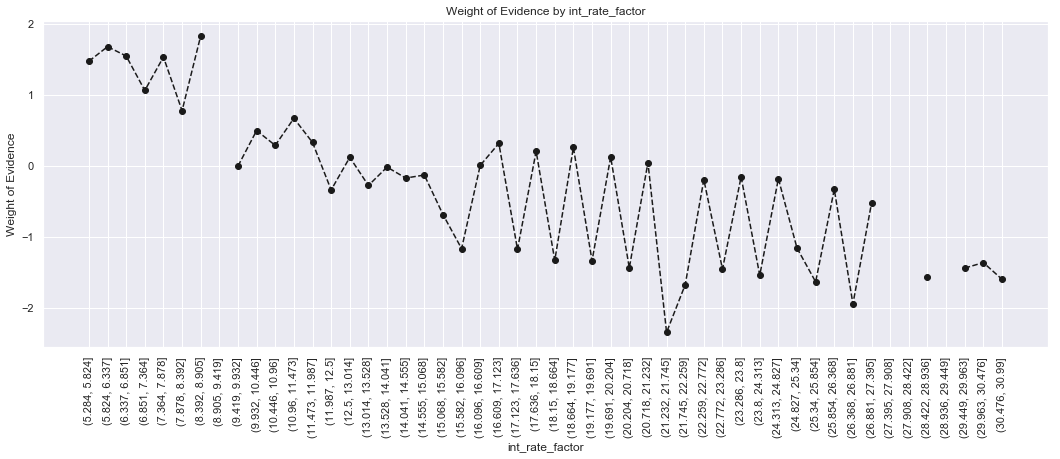

In [144]:
plot_by_woe(df_temp, 90)

In [145]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [146]:
#loan_data.loc[loan_data['int_rate'] < 5.8, 'int_rate:<5.8'] = 1
#(loan_data['int_rate'] > 5.8) & (loan_data['int_rate'] <= 8.64)
#loan_data['int_rate:<5.8'] = np.where(loan_data['int_rate'] < 5.8, 1, 0)
#loan_data[(loan_data['int_rate'] > 5.8) & (loan_data['int_rate'] <= 8.64)]
#loan_data['int_rate'][(np.where((loan_data['int_rate'] > 5.8) & (loan_data['int_rate'] <= 8.64)))]
#loan_data.loc[(loan_data['int_rate'] > 5.8) & (loan_data['int_rate'] <= 8.64), 'int_rate:<5.8'] = 1

In [147]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

### PD model: Data Preparation: Continuous Variables, Part 1: Homework

In [148]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                     (36.438, 48.24]   5542   0.974558    0.013331   5401.0   
1                      (48.24, 59.48]   9381   0.969833    0.022565   9098.0   
2                      (59.48, 70.72]   9575   0.973681    0.023031   9323.0   
3                      (70.72, 81.96]  10038   0.974597    0.024145   9783.0   
4                       (81.96, 93.2]  12527   0.975014    0.030132  12214.0   
5                      (93.2, 104.44]  10967   0.976475    0.026380  10709.0   
6                    (104.44, 115.68]  10588   0.976672    0.025468  10341.0   
7                    (115.68, 126.92]  13844   0.975441    0.033300  13504.0   
8                    (126.92, 138.16]  24697   0.973074    0.059405  24032.0   
9                     (138.16, 149.4]  28766   0.978412    0.069193  28145.0   
10                    (149.4, 160.64]  30168   0.977194    0.072565  29480.0   
11                   (160.64, 171.88]  27744   0.977869    0.066735  27130.0   
12                   (171.88, 183.12]  26826   0.978006    0.064527  26236.0   
13                   (183.12, 194.36]  21168   0.978411    0.050917  20711.0   
14                    (194.36, 205.6]  18153   0.978791    0.043665  17768.0   
15                    (205.6, 216.84]  16726   0.981107    0.040232  16410.0   
16                   (216.84, 228.08]  17058   0.981299    0.041031  16739.0   
17                   (228.08, 239.32]  14118   0.982434    0.033959  13870.0   
18                   (239.32, 250.56]  11737   0.980574    0.028232  11509.0   
19                    (250.56, 261.8]  10544   0.978661    0.025362  10319.0   
20                    (261.8, 273.04]  10860   0.980663    0.026122  10650.0   
21                   (273.04, 284.28]   9275   0.980809    0.022310   9097.0   
22                   (284.28, 295.52]   8077   0.983162    0.019428   7941.0   
23                   (295.52, 306.76]   7111   0.982843    0.017105   6989.0   
24                    (306.76, 318.0]   5652   0.983546    0.013595   5559.0   
25                    (318.0, 329.24]   4323   0.978025    0.010398   4228.0   
26                   (329.24, 340.48]   4302   0.982799    0.010348   4228.0   
27                   (340.48, 351.72]   4549   0.980215    0.010942   4459.0   
28                   (351.72, 362.96]   4181   0.984214    0.010057   4115.0   
29                    (362.96, 374.2]   3952   0.981275    0.009506   3878.0   
30                    (374.2, 385.44]   3319   0.984935    0.007983   3269.0   
31                   (385.44, 396.68]   2810   0.981495    0.006759   2758.0   
32                   (396.68, 407.92]   2506   0.978053    0.006028   2451.0   
33                   (407.92, 419.16]   2510   0.984064    0.006037   2470.0   
34                    (419.16, 430.4]   1839   0.975530    0.004423   1794.0   
35                    (430.4, 441.64]   1529   0.979725    0.003678   1498.0   
36                   (441.64, 452.88]   1177   0.983008    0.002831   1157.0   
37                   (452.88, 464.12]    943   0.979852    0.002268    924.0   
38                   (464.12, 475.36]    855   0.983626    0.002057    841.0   
39                    (475.36, 486.6]    901   0.978912    0.002167    882.0   
40                    (486.6, 497.84]    863   0.981460    0.002076    847.0   
41                   (497.84, 509.08]    729   0.976680    0.001754    712.0   
42                   (509.08, 520.32]    552   0.974638    0.001328    538.0   
43                   (520.32, 531.56]    401   0.980050    0.000965    393.0   
44                    (531.56, 542.8]    362   0.966851    0.000871    350.0   
45                    (542.8, 554.04]    398   0.977387    0.000957    389.0   
46                   (554.04, 565.28]    289   0.975779    0.000695    282.0   
47                   (565.28, 576.52]    223   0.982063    0.000536    219.0   
48                   (576.52, 587.76]    196   0.979592    0.000471    192.0   
49 

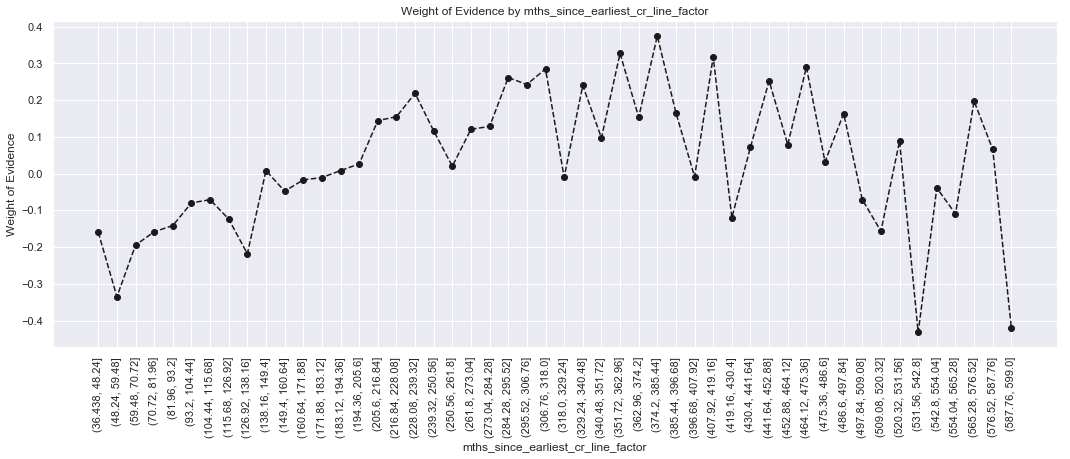

In [149]:
plot_by_woe(df_temp, 90)

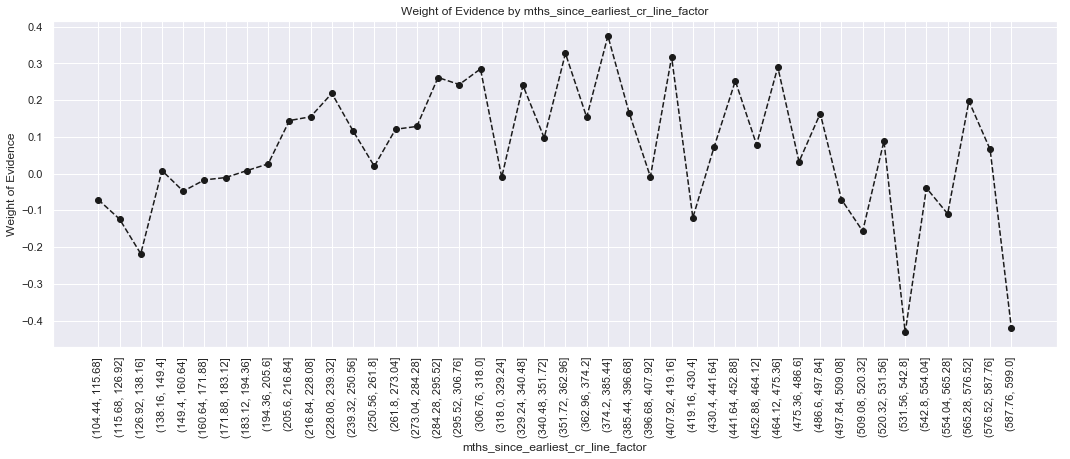

In [150]:
plot_by_woe(df_temp.iloc[6: , : ], 90)

In [151]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [152]:
# REFERENCE CATEGORY!!!

In [153]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


delinq_2yrs   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0             0  354558   0.978884    0.852844  347071.0  7487.0     0.853409   
1             1   43015   0.975846    0.103467   41976.0  1039.0     0.103214   
2             2   10779   0.972261    0.025928   10480.0   299.0     0.025769   
3             3    3779   0.968246    0.009090    3659.0   120.0     0.008997   
4             4    1669   0.967645    0.004015    1615.0    54.0     0.003971   
5             5     770   0.970130    0.001852     747.0    23.0     0.001837   
6             6     434   0.979263    0.001044     425.0     9.0     0.001045   
7             7     233   0.978541    0.000560     228.0     5.0     0.000561   
8             8     138   0.949275    0.000332     131.0     7.0     0.000322   
9             9     118   0.983051    0.000284     116.0     2.0     0.000285   
10           10      80   0.987500    0.000192      79.0     1.0     0.000194   
11           11      46   0.978261    0.000111      45.0     1.0     0.000111   
12           12      39   0.974359    0.000094      38.0     1.0     0.000093   
13           13      20   1.000000    0.000048      20.0     0.0     0.000049   
14           14      15   1.000000    0.000036      15.0     0.0     0.000037   
15           15      12   1.000000    0.000029      12.0     0.0     0.000030   
16           16       9   1.000000    0.000022       9.0     0.0     0.000022   
17           17       6   1.000000    0.000014       6.0     0.0     0.000015   
18           18       4   1.000000    0.000010       4.0     0.0     0.000010   
19           19       3   1.000000    0.000007       3.0     0.0     0.000007   
20           21       3   1.000000    0.000007       3.0     0.0     0.000007   
21           23       2   1.000000    0.000005       2.0     0.0     0.000005   
22           24       2   1.000000    0.000005       2.0     0.0     0.000005   
23           35       1   1.000000    0.000002       1.0     0.0     0.000002   
24           58       1   1.000000    0.000002       1.0     0.0     0.000002   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.827476  0.030859             NaN       NaN  inf  
1     0.114832 -0.106663        0.003038  0.137522  inf  
2     0.033046 -0.248722        0.003585  0.142059  inf  
3     0.013263 -0.388049        0.004015  0.139327  inf  
4     0.005968 -0.407396        0.000600  0.019347  inf  
5     0.002542 -0.324932        0.002485  0.082465  inf  
6     0.000995  0.049362        0.009133  0.374294  inf  
7     0.000553  0.014405        0.000722  0.034957  inf  
8     0.000774 -0.876215        0.029265  0.890621  inf  
9     0.000221  0.254940        0.033775  1.131156  inf  
10    0.000111  0.563945        0.004449  0.309005  inf  
11    0.000111  0.001160        0.009239  0.562785  inf  
12    0.000111 -0.167916        0.003902  0.169076  inf  
13    0.000000       inf        0.025641       inf  inf  
14    0.000000       inf        0.000000       NaN  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf  
20    0.000000       inf        0.000000       NaN  inf  
21    0.000000       inf        0.000000       NaN  inf  
22    0.000000       inf        0.000000       NaN  inf  
23    0.000000       inf        0.000000       NaN  inf  
24    0.000000       inf        0.000000       NaN  inf

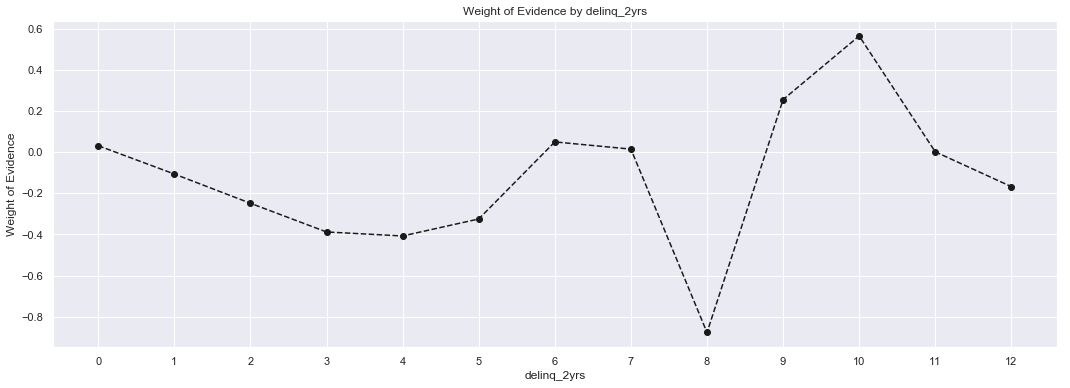

In [154]:
plot_by_woe(df_temp)

In [155]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [156]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

inq_last_6mths   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0               0  279911   0.982269    0.673290  274948.0  4963.0   
1               1   98784   0.972131    0.237612   96031.0  2753.0   
2               2   28635   0.966475    0.068878   27675.0   960.0   
3               3    7766   0.954932    0.018680    7416.0   350.0   
4               4     482   0.962656    0.001159     464.0    18.0   
5               5     158   0.974684    0.000380     154.0     4.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE      IV  
0     0.676066    0.548519  0.209069             NaN       NaN  0.0767  
1     0.236129    0.304266 -0.253523        0.010138  0.462592  0.0767  
2     0.068050    0.106101 -0.444151        0.005657  0.190628  0.0767  
3     0.018235    0.038683 -0.752041        0.011543  0.307890  0.0767  
4     0.001141    0.001989 -0.555990        0.007724  0.196051  0.0767  
5     0.000379    0.000442 -0.154844        0.012028  0.401145  0.0767

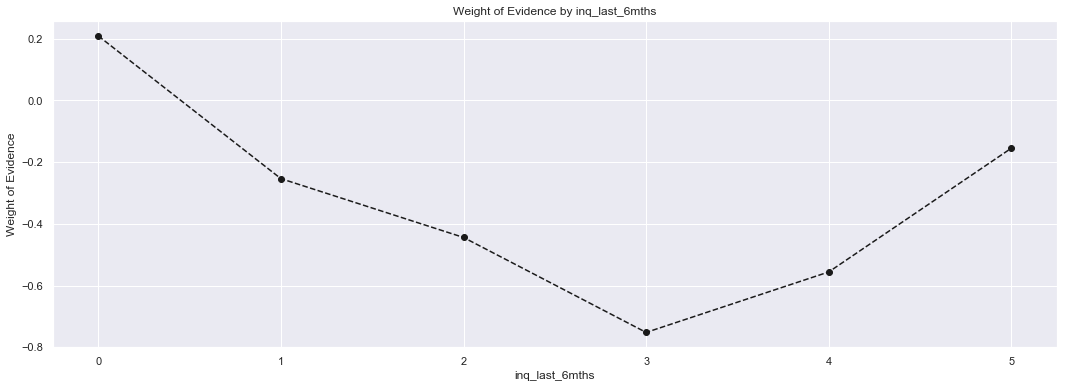

In [157]:
plot_by_woe(df_temp)

In [158]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [159]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp

open_acc  n_obs  prop_good  prop_n_obs   n_good  n_bad  prop_n_good  \
0          0     34   0.941176    0.000082     32.0    2.0     0.000079   
1          1    676   0.943787    0.001626    638.0   38.0     0.001569   
2          2   3547   0.964195    0.008532   3420.0  127.0     0.008409   
3          3   8428   0.967489    0.020272   8154.0  274.0     0.020050   
4          4  15255   0.972009    0.036694  14828.0  427.0     0.036460   
5          5  22471   0.975524    0.054051  21921.0  550.0     0.053901   
6          6  27958   0.976465    0.067249  27300.0  658.0     0.067128   
7          7  31942   0.977741    0.076832  31231.0  711.0     0.076794   
8          8  33649   0.978395    0.080938  32922.0  727.0     0.080951   
9          9  34308   0.979334    0.082524  33599.0  709.0     0.082616   
10        10  32687   0.978309    0.078624  31978.0  709.0     0.078630   
11        11  29728   0.978841    0.071507  29099.0  629.0     0.071551   
12        12  26973   0.978682    0.064880  26398.0  575.0     0.064910   
13        13  23727   0.978843    0.057072  23225.0  502.0     0.057108   
14        14  20842   0.980136    0.050133  20428.0  414.0     0.050230   
15        15  17790   0.981225    0.042792  17456.0  334.0     0.042922   
16        16  14861   0.978131    0.035746  14536.0  325.0     0.035742   
17        17  12361   0.980665    0.029733  12122.0  239.0     0.029807   
18        18  10327   0.979955    0.024840  10120.0  207.0     0.024884   
19        19   8559   0.982475    0.020588   8409.0  150.0     0.020677   
20        20   7077   0.980924    0.017023   6942.0  135.0     0.017070   
21        21   5902   0.979329    0.014197   5780.0  122.0     0.014212   
22        22   4734   0.977820    0.011387   4629.0  105.0     0.011382   
23        23   3994   0.980971    0.009607   3918.0   76.0     0.009634   
24        24   3286   0.984784    0.007904   3236.0   50.0     0.007957   
25        25   2697   0.981090    0.006487   2646.0   51.0     0.006506   
26        26   2194   0.981768    0.005277   2154.0   40.0     0.005296   
27        27   1776   0.979730    0.004272   1740.0   36.0     0.004278   
28        28   1441   0.981957    0.003466   1415.0   26.0     0.003479   
29        29   1206   0.985904    0.002901   1189.0   17.0     0.002924   
30        30   1001   0.976024    0.002408    977.0   24.0     0.002402   
31        31    781   0.985915    0.001879    770.0   11.0     0.001893   
32        32    627   0.993620    0.001508    623.0    4.0     0.001532   
33        33    533   0.984991    0.001282    525.0    8.0     0.001291   
34        34    384   0.976562    0.000924    375.0    9.0     0.000922   
35        35    366   0.978142    0.000880    358.0    8.0     0.000880   
36        36    266   0.992481    0.000640    264.0    2.0     0.000649   
37        37    238   1.000000    0.000572    238.0    0.0     0.000585   
38        38    197   0.974619    0.000474    192.0    5.0     0.000472   
39        39    169   0.988166    0.000407    167.0    2.0     0.000411   
40        40    132   0.984848    0.000318    130.0    2.0     0.000320   
41        41    106   0.990566    0.000255    105.0    1.0     0.000258   
42        42     77   0.987013    0.000185     76.0    1.0     0.000187   
43        43     67   1.000000    0.000161     67.0    0.0     0.000165   
44        44     62   0.983871    0.000149     61.0    1.0     0.000150   
45        45     57   1.000000    0.000137     57.0    0.0     0.000140   
46        46     38   0.973684    0.000091     37.0    1.0     0.000091   
47        47     30   0.966667    0.000072     29.0    1.0     0.000071   
48        48     27   1.000000    0.000065     27.0    0.0     0.000066   
49        49     18   1.000000    0.000043     18.0    0.0     0.000044   
50        50     16   0.937500    0.000038     15.0    1.0     0.000037   
51        51     14   1.000000    0.000034     14.0    0.0     0.000034   
52        52     17   1.00000

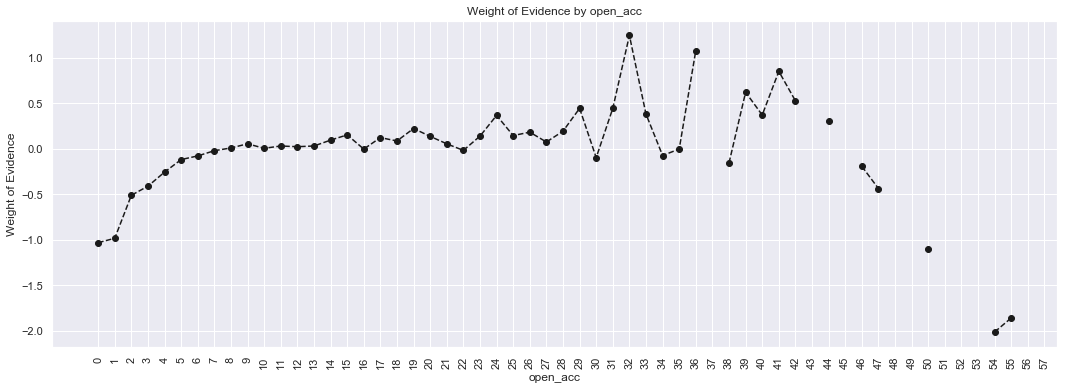

In [160]:
plot_by_woe(df_temp, 90)

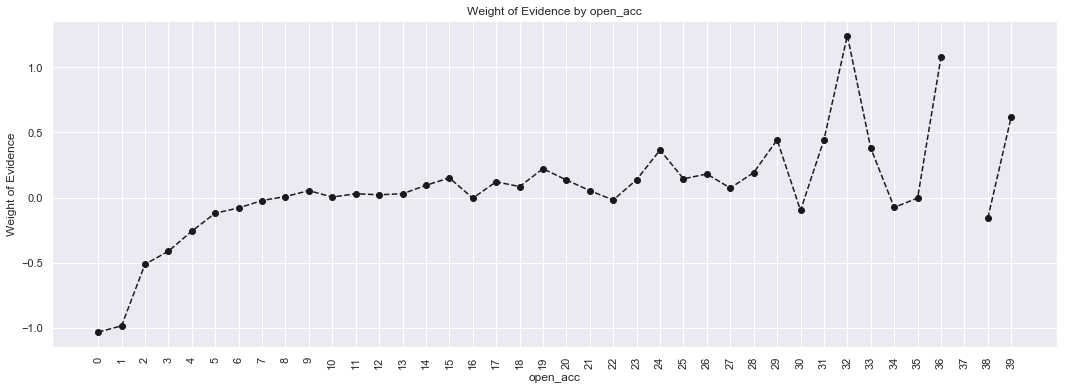

In [161]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [162]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [163]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

pub_rec   n_obs  prop_good  prop_n_obs    n_good   n_bad  prop_n_good  \
0         0  364045   0.978753    0.875664  356310.0  7735.0     0.876126   
1         1   50439   0.974801    0.121325   49168.0  1271.0     0.120899   
2         2     899   0.962180    0.002162     865.0    34.0     0.002127   
3         3     207   0.985507    0.000498     204.0     3.0     0.000502   
4         4      81   0.962963    0.000195      78.0     3.0     0.000192   
5         5      29   0.965517    0.000070      28.0     1.0     0.000069   
6         6      17   0.941176    0.000041      16.0     1.0     0.000039   
7         7      10   1.000000    0.000024      10.0     0.0     0.000025   
8         8       3   1.000000    0.000007       3.0     0.0     0.000007   
9         9       2   1.000000    0.000005       2.0     0.0     0.000005   
10       10       1   1.000000    0.000002       1.0     0.0     0.000002   
11       13       2   1.000000    0.000005       2.0     0.0     0.000005   
12       15       1   1.000000    0.000002       1.0     0.0     0.000002   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.854885  0.024543             NaN       NaN  inf  
1     0.140473 -0.150064        0.003951  0.174607  inf  
2     0.003758 -0.569134        0.012621  0.419070  inf  
3     0.000332  0.414005        0.023327  0.983139  inf  
4     0.000332 -0.547406        0.022544  0.961411  inf  
5     0.000111 -0.473298        0.002554  0.074108  inf  
6     0.000111 -1.032914        0.024341  0.559616  inf  
7     0.000000       inf        0.058824       inf  inf  
8     0.000000       inf        0.000000       NaN  inf  
9     0.000000       inf        0.000000       NaN  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf

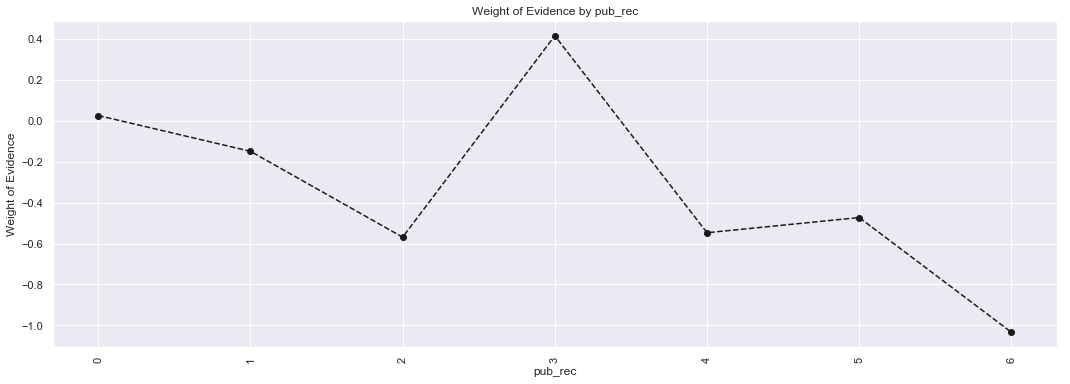

In [164]:
plot_by_woe(df_temp, 90)

In [165]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [166]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (1.842, 5.16]   9904   0.966175    0.023823   9569.0   335.0   
1       (5.16, 8.32]  23801   0.972732    0.057250  23152.0   649.0   
2      (8.32, 11.48]  36788   0.976568    0.088489  35926.0   862.0   
3     (11.48, 14.64]  44462   0.977734    0.106948  43472.0   990.0   
4      (14.64, 17.8]  46910   0.978086    0.112836  45882.0  1028.0   
5      (17.8, 20.96]  45584   0.979883    0.109647  44667.0   917.0   
6     (20.96, 24.12]  54330   0.979514    0.130684  53217.0  1113.0   
7     (24.12, 27.28]  34348   0.979271    0.082620  33636.0   712.0   
8     (27.28, 30.44]  27959   0.979792    0.067252  27394.0   565.0   
9      (30.44, 33.6]  22745   0.978896    0.054710  22265.0   480.0   
10     (33.6, 36.76]  17487   0.979814    0.042063  17134.0   353.0   
11    (36.76, 39.92]  13082   0.978826    0.031467  12805.0   277.0   
12    (39.92, 43.08]  13060   0.980322    0.031414  12803.0   257.0   
13    (43.08, 46.24]   6814   0.980188    0.016390   6679.0   135.0   
14     (46.24, 49.4]   5285   0.979943    0.012712   5179.0   106.0   
15     (49.4, 52.56]   3654   0.980296    0.008789   3582.0    72.0   
16    (52.56, 55.72]   2625   0.979810    0.006314   2572.0    53.0   
17    (55.72, 58.88]   1870   0.980214    0.004498   1833.0    37.0   
18    (58.88, 62.04]   1760   0.979545    0.004233   1724.0    36.0   
19     (62.04, 65.2]    895   0.985475    0.002153    882.0    13.0   
20     (65.2, 68.36]    670   0.968657    0.001612    649.0    21.0   
21    (68.36, 71.52]    455   0.982418    0.001094    447.0     8.0   
22    (71.52, 74.68]    333   0.978979    0.000801    326.0     7.0   
23    (74.68, 77.84]    247   0.963563    0.000594    238.0     9.0   
24     (77.84, 81.0]    207   0.971014    0.000498    201.0     6.0   
25     (81.0, 84.16]    119   0.974790    0.000286    116.0     3.0   
26    (84.16, 87.32]     84   0.988095    0.000202     83.0     1.0   
27    (87.32, 90.48]     73   1.000000    0.000176     73.0     0.0   
28    (90.48, 93.64]     44   0.977273    0.000106     43.0     1.0   
29     (93.64, 96.8]     35   1.000000    0.000084     35.0     0.0   
30     (96.8, 99.96]     24   0.916667    0.000058     22.0     2.0   
31   (99.96, 103.12]     25   1.000000    0.000060     25.0     0.0   
32  (103.12, 106.28]     12   1.000000    0.000029     12.0     0.0   
33  (106.28, 109.44]     10   1.000000    0.000024     10.0     0.0   
34   (109.44, 112.6]      5   1.000000    0.000012      5.0     0.0   
35   (112.6, 115.76]      6   1.000000    0.000014      6.0     0.0   
36  (115.76, 118.92]      8   1.000000    0.000019      8.0     0.0   
37  (118.92, 122.08]      3   1.000000    0.000007      3.0     0.0   
38  (122.08, 125.24]      2   1.000000    0.000005      2.0     0.0   
39   (125.24, 128.4]      1   1.000000    0.000002      1.0     0.0   
40   (128.4, 131.56]      1   1.000000    0.000002      1.0     0.0   
41  (131.56, 134.72]      3   1.000000    0.000007      3.0     0.0   
42  (134.72, 137.88]      0        NaN    0.000000      NaN     NaN   
43  (137.88, 141.04]      2   1.000000    0.000005      2.0     0.0   
44   (141.04, 144.2]      0        NaN    0.000000      NaN     NaN   
45   (144.2, 147.36]      1   1.000000    0.000002      1.0     0.0   
46  (147.36, 150.52]      1   1.000000    0.000002      1.0     0.0   
47  (150.52, 153.68]      1   1.000000    0.000002      1.0     0.0   
48  (153.68, 156.84]      0        NaN    0.000000      NaN     NaN   
49   (156.84, 160.0]      1   1.000000    0.000002      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.023529    0.037025 -0.453349             NaN       NaN  inf  
1      0.056928    0.071729 -0.231099        0.006557  0.222250  inf  
2      0.088338    0.095270 -0.075541        0.003836  0.155558  inf  
3      0.106893    0.109416 -0.023335        0.001165  0.052206  inf  
4      0.112819    0.113616

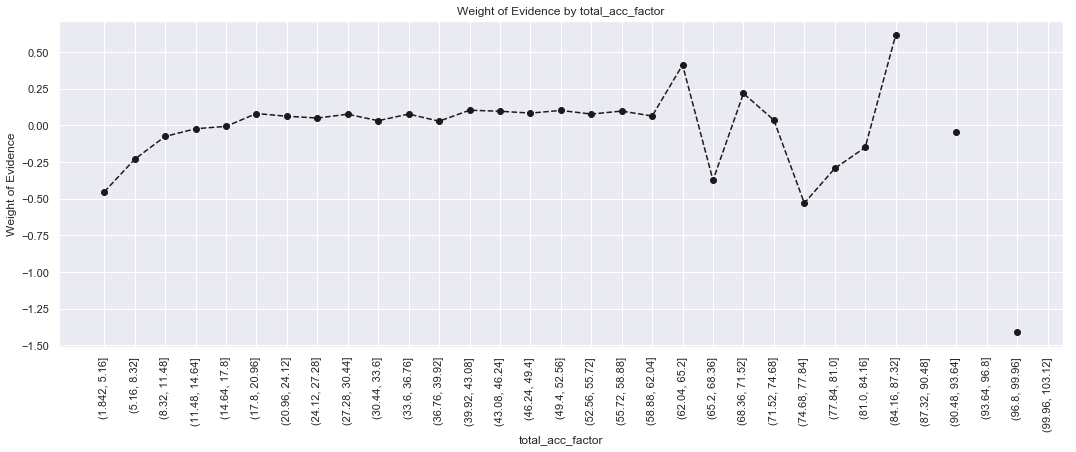

In [167]:
plot_by_woe(df_temp, 90)

In [168]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [169]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0               0  415736   0.978236         1.0  406688.0  9048.0   

   prop_n_good  prop_n_bad  WoE  diff_prop_good  diff_WoE   IV  
0          1.0         1.0  0.0             NaN       NaN  0.0

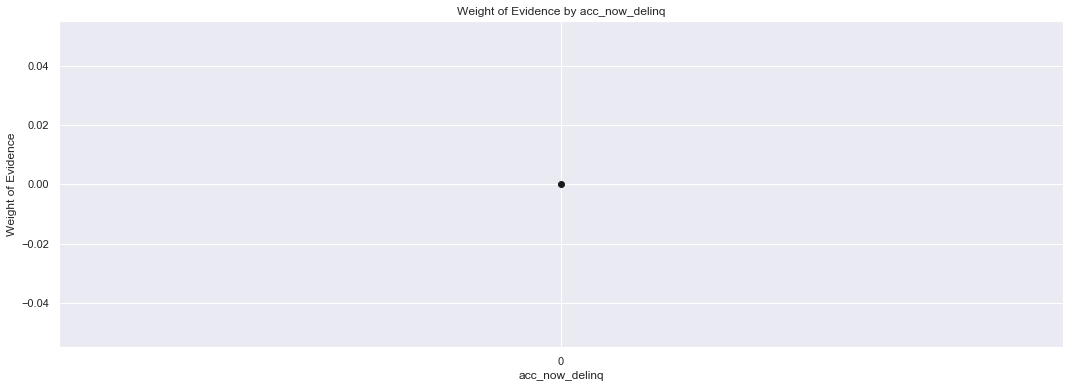

In [170]:
plot_by_woe(df_temp)

In [171]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [172]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0          (-2087.5, 1043.75]   1491   0.944333    0.003586  1408.0   83.0   
1           (1043.75, 2087.5]   2100   0.953333    0.005051  2002.0   98.0   
2           (2087.5, 3131.25]   3363   0.954208    0.008089  3209.0  154.0   
3           (3131.25, 4175.0]   3911   0.965993    0.009407  3778.0  133.0   
4           (4175.0, 5218.75]   5551   0.966312    0.013352  5364.0  187.0   
5           (5218.75, 6262.5]   5810   0.969707    0.013975  5634.0  176.0   
6           (6262.5, 7306.25]   7185   0.972025    0.017283  6984.0  201.0   
7           (7306.25, 8350.0]   7079   0.972312    0.017028  6883.0  196.0   
8           (8350.0, 9393.75]   7566   0.972244    0.018199  7356.0  210.0   
9          (9393.75, 10437.5]   8764   0.973300    0.021081  8530.0  234.0   
10        (10437.5, 11481.25]   8402   0.972149    0.020210  8168.0  234.0   
11        (11481.25, 12525.0]   9693   0.974827    0.023315  9449.0  244.0   
12        (12525.0, 13568.75]   8707   0.974274    0.020944  8483.0  224.0   
13        (13568.75, 14612.5]   9621   0.977861    0.023142  9408.0  213.0   
14        (14612.5, 15656.25]   9191   0.975193    0.022108  8963.0  228.0   
15        (15656.25, 16700.0]   9808   0.976652    0.023592  9579.0  229.0   
16        (16700.0, 17743.75]   9204   0.974902    0.022139  8973.0  231.0   
17        (17743.75, 18787.5]   9101   0.975497    0.021891  8878.0  223.0   
18        (18787.5, 19831.25]   9967   0.977626    0.023974  9744.0  223.0   
19        (19831.25, 20875.0]   8642   0.978246    0.020787  8454.0  188.0   
20        (20875.0, 21918.75]   9429   0.977622    0.022680  9218.0  211.0   
21        (21918.75, 22962.5]   8594   0.973819    0.020672  8369.0  225.0   
22        (22962.5, 24006.25]   9178   0.977664    0.022077  8973.0  205.0   
23        (24006.25, 25050.0]   8029   0.975588    0.019313  7833.0  196.0   
24        (25050.0, 26093.75]   7791   0.979207    0.018740  7629.0  162.0   
25        (26093.75, 27137.5]   8265   0.978584    0.019880  8088.0  177.0   
26        (27137.5, 28181.25]   7323   0.977741    0.017615  7160.0  163.0   
27        (28181.25, 29225.0]   7747   0.979347    0.018634  7587.0  160.0   
28        (29225.0, 30268.75]   6956   0.978436    0.016732  6806.0  150.0   
29        (30268.75, 31312.5]   7487   0.978496    0.018009  7326.0  161.0   
30        (31312.5, 32356.25]   6435   0.981507    0.015479  6316.0  119.0   
31        (32356.25, 33400.0]   6744   0.978796    0.016222  6601.0  143.0   
32        (33400.0, 34443.75]   6003   0.982509    0.014439  5898.0  105.0   
33        (34443.75, 35487.5]   5901   0.978987    0.014194  5777.0  124.0   
34        (35487.5, 36531.25]   6226   0.974783    0.014976  6069.0  157.0   
35        (36531.25, 37575.0]   5447   0.977602    0.013102  5325.0  122.0   
36        (37575.0, 38618.75]   5754   0.978624    0.013841  5631.0  123.0   
37        (38618.75, 39662.5]   4982   0.979125    0.011984  4878.0  104.0   
38        (39662.5, 40706.25]   5338   0.981641    0.012840  5240.0   98.0   
39        (40706.25, 41750.0]   4690   0.983369    0.011281  4612.0   78.0   
40        (41750.0, 42793.75]   4503   0.982456    0.010831  4424.0   79.0   
41        (42793.75, 43837.5]   4736   0.981419    0.011392  4648.0   88.0   
42        (43837.5, 44881.25]   4204   0.982636    0.010112  4131.0   73.0   
43        (44881.25, 45925.0]   4545   0.981298    0.010932  4460.0   85.0   
44        (45925.0, 46968.75]   3888   0.982767    0.009352  3821.0   67.0   
45        (46968.75, 48012.5]   4239   0.980420    0.010196  4156.0   83.0   
46        (48012.5, 49056.25]   3662   0.981431    0.008808  3594.0   68.0   
47        (49056.25, 50100.0]   3818   0.983761    0.009184  3756.0   62.0   
48        (50100.0, 51143.75]   3324   0.981047    0.007995  3261.0   63.0   
49        (51143.75, 52187.5]   3248   0.982143    0.007813  3190.0   58.0   
...                       ..

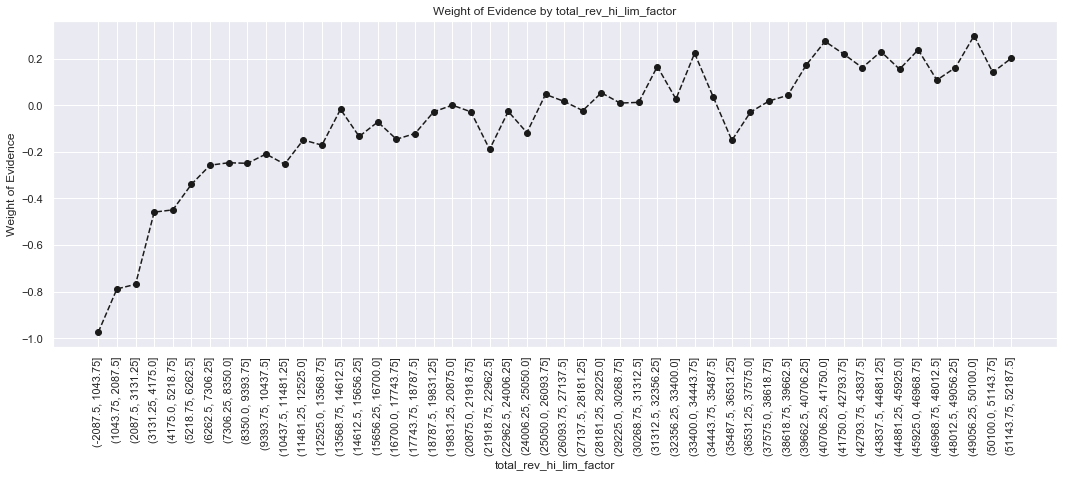

In [173]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [174]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

# PD model: Data Preparation: Continuous Variables, Part 2

In [175]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0    (-9930.475, 198609.5]  402045   0.978057    0.967068  393223.0  8822.0   
1     (198609.5, 397219.0]   11955   0.983940    0.028756   11763.0   192.0   
2     (397219.0, 595828.5]    1087   0.985281    0.002615    1071.0    16.0   
3     (595828.5, 794438.0]     311   0.983923    0.000748     306.0     5.0   
4     (794438.0, 993047.5]     126   0.968254    0.000303     122.0     4.0   
5    (993047.5, 1191657.0]      64   0.921875    0.000154      59.0     5.0   
6   (1191657.0, 1390266.5]      40   1.000000    0.000096      40.0     0.0   
7   (1390266.5, 1588876.0]      18   0.944444    0.000043      17.0     1.0   
8   (1588876.0, 1787485.5]       7   0.857143    0.000017       6.0     1.0   
9   (1787485.5, 1986095.0]       9   1.000000    0.000022       9.0     0.0   
10  (1986095.0, 2184704.5]      11   1.000000    0.000026      11.0     0.0   
11  (2184704.5, 2383314.0]       3   1.000000    0.000007       3.0     0.0   
12  (2383314.0, 2581923.5]       4   1.000000    0.000010       4.0     0.0   
13  (2581923.5, 2780533.0]       0        NaN    0.000000       NaN     NaN   
14  (2780533.0, 2979142.5]       2   1.000000    0.000005       2.0     0.0   
15  (2979142.5, 3177752.0]       7   0.857143    0.000017       6.0     1.0   
16  (3177752.0, 3376361.5]       2   1.000000    0.000005       2.0     0.0   
17  (3376361.5, 3574971.0]       0        NaN    0.000000       NaN     NaN   
18  (3574971.0, 3773580.5]       3   1.000000    0.000007       3.0     0.0   
19  (3773580.5, 3972190.0]       1   1.000000    0.000002       1.0     0.0   
20  (3972190.0, 4170799.5]       2   1.000000    0.000005       2.0     0.0   
21  (4170799.5, 4369409.0]       2   0.500000    0.000005       1.0     1.0   
22  (4369409.0, 4568018.5]       3   1.000000    0.000007       3.0     0.0   
23  (4568018.5, 4766628.0]       1   1.000000    0.000002       1.0     0.0   
24  (4766628.0, 4965237.5]       2   1.000000    0.000005       2.0     0.0   
25  (4965237.5, 5163847.0]       1   1.000000    0.000002       1.0     0.0   
26  (5163847.0, 5362456.5]       2   1.000000    0.000005       2.0     0.0   
27  (5362456.5, 5561066.0]       0        NaN    0.000000       NaN     NaN   
28  (5561066.0, 5759675.5]       3   1.000000    0.000007       3.0     0.0   
29  (5759675.5, 5958285.0]       1   1.000000    0.000002       1.0     0.0   
30  (5958285.0, 6156894.5]       3   1.000000    0.000007       3.0     0.0   
31  (6156894.5, 6355504.0]       3   1.000000    0.000007       3.0     0.0   
32  (6355504.0, 6554113.5]       0        NaN    0.000000       NaN     NaN   
33  (6554113.5, 6752723.0]       2   1.000000    0.000005       2.0     0.0   
34  (6752723.0, 6951332.5]       1   1.000000    0.000002       1.0     0.0   
35  (6951332.5, 7149942.0]       2   1.000000    0.000005       2.0     0.0   
36  (7149942.0, 7348551.5]       2   1.000000    0.000005       2.0     0.0   
37  (7348551.5, 7547161.0]       1   1.000000    0.000002       1.0     0.0   
38  (7547161.0, 7745770.5]       2   1.000000    0.000005       2.0     0.0   
39  (7745770.5, 7944380.0]       0        NaN    0.000000       NaN     NaN   
40  (7944380.0, 8142989.5]       1   1.000000    0.000002       1.0     0.0   
41  (8142989.5, 8341599.0]       1   1.000000    0.000002       1.0     0.0   
42  (8341599.0, 8540208.5]       1   1.000000    0.000002       1.0     0.0   
43  (8540208.5, 8738818.0]       0        NaN    0.000000       NaN     NaN   
44  (8738818.0, 8937427.5]       0        NaN    0.000000       NaN     NaN   
45  (8937427.5, 9136037.0]       2   1.000000    0.000005       2.0     0.0   
46  (9136037.0, 9334646.5]       1   1.000000    0.000002       1.0     0.0   
47  (9334646.5, 9533256.0]       0        NaN    0.000000       NaN     NaN   
48  (9533256.0, 9731865.5]       0        NaN    0.000000       NaN     NaN   
49  (9731865.5, 9930475.0]       2   1.000000    0.000005  

In [176]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


annual_inc_factor   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0     (-9930.475, 99304.75]  316911   0.977177    0.762289  309678.0  7233.0   
1      (99304.75, 198609.5]   85134   0.981335    0.204779   83545.0  1589.0   
2     (198609.5, 297914.25]    9670   0.983454    0.023260    9510.0   160.0   
3     (297914.25, 397219.0]    2285   0.985996    0.005496    2253.0    32.0   
4     (397219.0, 496523.75]     778   0.988432    0.001871     769.0     9.0   
5     (496523.75, 595828.5]     309   0.977346    0.000743     302.0     7.0   
6     (595828.5, 695133.25]     180   0.983333    0.000433     177.0     3.0   
7     (695133.25, 794438.0]     131   0.984733    0.000315     129.0     2.0   
8     (794438.0, 893742.75]      67   0.955224    0.000161      64.0     3.0   
9     (893742.75, 993047.5]      59   0.983051    0.000142      58.0     1.0   
10   (993047.5, 1092352.25]      41   0.902439    0.000099      37.0     4.0   
11  (1092352.25, 1191657.0]      23   0.956522    0.000055      22.0     1.0   
12  (1191657.0, 1290961.75]      26   1.000000    0.000063      26.0     0.0   
13  (1290961.75, 1390266.5]      14   1.000000    0.000034      14.0     0.0   
14  (1390266.5, 1489571.25]       7   1.000000    0.000017       7.0     0.0   
15  (1489571.25, 1588876.0]      11   0.909091    0.000026      10.0     1.0   
16  (1588876.0, 1688180.75]       4   0.750000    0.000010       3.0     1.0   
17  (1688180.75, 1787485.5]       3   1.000000    0.000007       3.0     0.0   
18  (1787485.5, 1886790.25]       3   1.000000    0.000007       3.0     0.0   
19  (1886790.25, 1986095.0]       6   1.000000    0.000014       6.0     0.0   
20  (1986095.0, 2085399.75]       9   1.000000    0.000022       9.0     0.0   
21  (2085399.75, 2184704.5]       2   1.000000    0.000005       2.0     0.0   
22  (2184704.5, 2284009.25]       0        NaN    0.000000       NaN     NaN   
23  (2284009.25, 2383314.0]       3   1.000000    0.000007       3.0     0.0   
24  (2383314.0, 2482618.75]       1   1.000000    0.000002       1.0     0.0   
25  (2482618.75, 2581923.5]       3   1.000000    0.000007       3.0     0.0   
26  (2581923.5, 2681228.25]       0        NaN    0.000000       NaN     NaN   
27  (2681228.25, 2780533.0]       0        NaN    0.000000       NaN     NaN   
28  (2780533.0, 2879837.75]       1   1.000000    0.000002       1.0     0.0   
29  (2879837.75, 2979142.5]       1   1.000000    0.000002       1.0     0.0   
30  (2979142.5, 3078447.25]       5   1.000000    0.000012       5.0     0.0   
31  (3078447.25, 3177752.0]       2   0.500000    0.000005       1.0     1.0   
32  (3177752.0, 3277056.75]       1   1.000000    0.000002       1.0     0.0   
33  (3277056.75, 3376361.5]       1   1.000000    0.000002       1.0     0.0   
34  (3376361.5, 3475666.25]       0        NaN    0.000000       NaN     NaN   
35  (3475666.25, 3574971.0]       0        NaN    0.000000       NaN     NaN   
36  (3574971.0, 3674275.75]       2   1.000000    0.000005       2.0     0.0   
37  (3674275.75, 3773580.5]       1   1.000000    0.000002       1.0     0.0   
38  (3773580.5, 3872885.25]       1   1.000000    0.000002       1.0     0.0   
39  (3872885.25, 3972190.0]       0        NaN    0.000000       NaN     NaN   
40  (3972190.0, 4071494.75]       1   1.000000    0.000002       1.0     0.0   
41  (4071494.75, 4170799.5]       1   1.000000    0.000002       1.0     0.0   
42  (4170799.5, 4270104.25]       1   0.000000    0.000002       0.0     1.0   
43  (4270104.25, 4369409.0]       1   1.000000    0.000002       1.0     0.0   
44  (4369409.0, 4468713.75]       1   1.000000    0.000002       1.0     0.0   
45  (4468713.75, 4568018.5]       2   1.000000    0.000005       2.0     0.0   
46  (4568018.5, 4667323.25]       1   1.000000    0.000002       1.0     0.0   
47  (4667323.25, 4766628.0]       0        NaN    0.000000       NaN     NaN   
48  (4766628.0, 4865932.75]       2   1.000000    0.000005       2.0     0.0   
49  (48659

In [177]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.

In [178]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [179]:
#pd.options.mode.chained_assignment = None 

In [180]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0       (-140.0, 2800.0]   1149   0.976501    0.003037   1122.0   27.0   
1       (2800.0, 5600.0]    253   0.992095    0.000669    251.0    2.0   
2       (5600.0, 8400.0]    358   0.963687    0.000946    345.0   13.0   
3      (8400.0, 11200.0]   1147   0.966870    0.003032   1109.0   38.0   
4     (11200.0, 14000.0]   1610   0.967081    0.004255   1557.0   53.0   
5     (14000.0, 16800.0]   2275   0.975824    0.006013   2220.0   55.0   
6     (16800.0, 19600.0]   2332   0.964408    0.006164   2249.0   83.0   
7     (19600.0, 22400.0]   4611   0.967903    0.012188   4463.0  148.0   
8     (22400.0, 25200.0]   7255   0.974363    0.019176   7069.0  186.0   
9     (25200.0, 28000.0]   5525   0.970498    0.014603   5362.0  163.0   
10    (28000.0, 30800.0]   9302   0.972479    0.024587   9046.0  256.0   
11    (30800.0, 33600.0]   8057   0.974805    0.021296   7854.0  203.0   
12    (33600.0, 36400.0]  14066   0.976326    0.037179  13733.0  333.0   
13    (36400.0, 39200.0]   8966   0.972563    0.023699   8720.0  246.0   
14    (39200.0, 42000.0]  19433   0.977924    0.051365  19004.0  429.0   
15    (42000.0, 44800.0]   6158   0.975966    0.016277   6010.0  148.0   
16    (44800.0, 47600.0]  15936   0.977284    0.042122  15574.0  362.0   
17    (47600.0, 50400.0]  22336   0.976764    0.059038  21817.0  519.0   
18    (50400.0, 53200.0]  10730   0.976142    0.028361  10474.0  256.0   
19    (53200.0, 56000.0]  16916   0.976768    0.044712  16523.0  393.0   
20    (56000.0, 58800.0]   6965   0.979899    0.018410   6825.0  140.0   
21    (58800.0, 61600.0]  19734   0.978869    0.052160  19317.0  417.0   
22    (61600.0, 64400.0]   8689   0.979284    0.022966   8509.0  180.0   
23    (64400.0, 67200.0]  16891   0.978095    0.044646  16521.0  370.0   
24    (67200.0, 70000.0]  17216   0.977637    0.045505  16831.0  385.0   
25    (70000.0, 72800.0]   7000   0.978857    0.018502   6852.0  148.0   
26    (72800.0, 75600.0]  15110   0.979947    0.039938  14807.0  303.0   
27    (75600.0, 78400.0]   6150   0.975772    0.016255   6001.0  149.0   
28    (78400.0, 81200.0]  14279   0.979270    0.037742  13983.0  296.0   
29    (81200.0, 84000.0]   6063   0.977404    0.016026   5926.0  137.0   
30    (84000.0, 86800.0]  10154   0.979811    0.026839   9949.0  205.0   
31    (86800.0, 89600.0]   4694   0.979122    0.012407   4596.0   98.0   
32    (89600.0, 92400.0]  11823   0.981984    0.031250  11610.0  213.0   
33    (92400.0, 95200.0]   7563   0.982018    0.019990   7427.0  136.0   
34    (95200.0, 98000.0]   5215   0.977373    0.013784   5097.0  118.0   
35   (98000.0, 100800.0]  10902   0.977527    0.028816  10657.0  245.0   
36  (100800.0, 103600.0]   3197   0.982171    0.008450   3140.0   57.0   
37  (103600.0, 106400.0]   5242   0.984166    0.013855   5159.0   83.0   
38  (106400.0, 109200.0]   2624   0.980564    0.006936   2573.0   51.0   
39  (109200.0, 112000.0]   7099   0.982814    0.018764   6977.0  122.0   
40  (112000.0, 114800.0]   1284   0.980530    0.003394   1259.0   25.0   
41  (114800.0, 117600.0]   3888   0.984311    0.010277   3827.0   61.0   
42  (117600.0, 120400.0]   8721   0.979475    0.023051   8542.0  179.0   
43  (120400.0, 123200.0]   1252   0.978435    0.003309   1225.0   27.0   
44  (123200.0, 126000.0]   4965   0.980262    0.013123   4867.0   98.0   
45  (126000.0, 128800.0]   1030   0.977670    0.002722   1007.0   23.0   
46  (128800.0, 131600.0]   4454   0.983386    0.011773   4380.0   74.0   
47  (131600.0, 134400.0]   1107   0.986450    0.002926   1092.0   15.0   
48  (134400.0, 137200.0]   2712   0.981195    0.007168   2661.0   51.0   
49  (137200.0, 140000.0]   3896   0.978696    0.010298   3813.0   83.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003033    0.003214 -0.057818             NaN       NaN  0.021602  
1      0.000679    0.000238  1.047456        0.015594  1.105275  0.021602  
2   

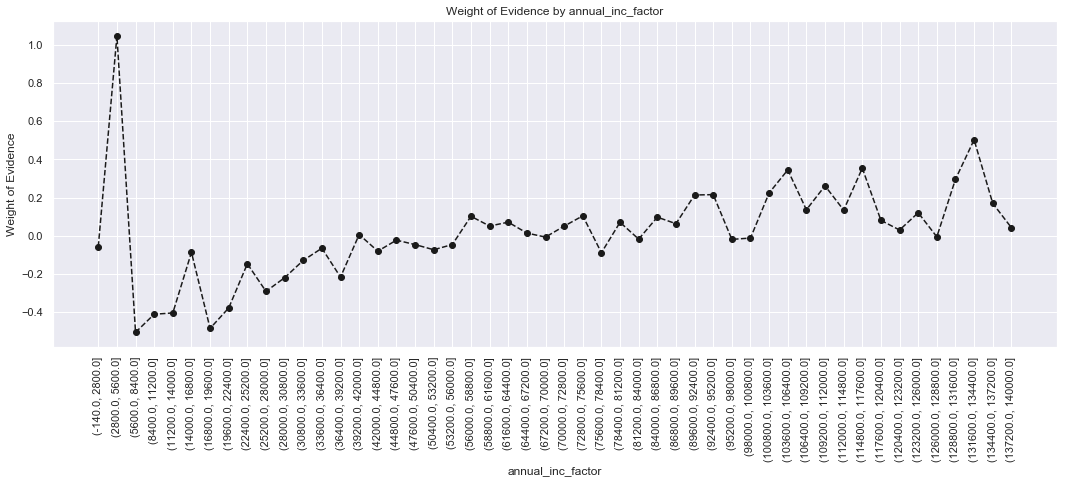

In [181]:
plot_by_woe(df_temp, 90)

In [182]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [183]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


dti_factor   n_obs  prop_good  prop_n_obs    n_good   n_bad  \
0     (-0.999, 9.99]   82305   0.975044    0.198430   80251.0  2054.0   
1      (9.99, 19.98]  160950   0.980907    0.388036  157877.0  3073.0   
2     (19.98, 29.97]  115277   0.978738    0.277923  112826.0  2451.0   
3     (29.97, 39.96]   43897   0.974372    0.105832   42772.0  1125.0   
4     (39.96, 49.95]    5333   0.974311    0.012857    5196.0   137.0   
5     (49.95, 59.94]    2783   0.974488    0.006710    2712.0    71.0   
6     (59.94, 69.93]    1321   0.970477    0.003185    1282.0    39.0   
7     (69.93, 79.92]     772   0.975389    0.001861     753.0    19.0   
8     (79.92, 89.91]     480   0.975000    0.001157     468.0    12.0   
9      (89.91, 99.9]     349   0.962751    0.000841     336.0    13.0   
10    (99.9, 109.89]     211   0.966825    0.000509     204.0     7.0   
11  (109.89, 119.88]     143   0.993007    0.000345     142.0     1.0   
12  (119.88, 129.87]     120   0.983333    0.000289     118.0     2.0   
13  (129.87, 139.86]      97   0.958763    0.000234      93.0     4.0   
14  (139.86, 149.85]      78   0.987179    0.000188      77.0     1.0   
15  (149.85, 159.84]      77   0.987013    0.000186      76.0     1.0   
16  (159.84, 169.83]      35   0.971429    0.000084      34.0     1.0   
17  (169.83, 179.82]      43   0.976744    0.000104      42.0     1.0   
18  (179.82, 189.81]      38   0.947368    0.000092      36.0     2.0   
19   (189.81, 199.8]      39   0.948718    0.000094      37.0     2.0   
20   (199.8, 209.79]      32   0.937500    0.000077      30.0     2.0   
21  (209.79, 219.78]      16   1.000000    0.000039      16.0     0.0   
22  (219.78, 229.77]      16   1.000000    0.000039      16.0     0.0   
23  (229.77, 239.76]      18   1.000000    0.000043      18.0     0.0   
24  (239.76, 249.75]      25   1.000000    0.000060      25.0     0.0   
25  (249.75, 259.74]      13   1.000000    0.000031      13.0     0.0   
26  (259.74, 269.73]      22   0.909091    0.000053      20.0     2.0   
27  (269.73, 279.72]      11   1.000000    0.000027      11.0     0.0   
28  (279.72, 289.71]      14   0.928571    0.000034      13.0     1.0   
29   (289.71, 299.7]      23   1.000000    0.000055      23.0     0.0   
30   (299.7, 309.69]       9   1.000000    0.000022       9.0     0.0   
31  (309.69, 319.68]       9   0.888889    0.000022       8.0     1.0   
32  (319.68, 329.67]       8   1.000000    0.000019       8.0     0.0   
33  (329.67, 339.66]       5   1.000000    0.000012       5.0     0.0   
34  (339.66, 349.65]       7   1.000000    0.000017       7.0     0.0   
35  (349.65, 359.64]      10   1.000000    0.000024      10.0     0.0   
36  (359.64, 369.63]       5   1.000000    0.000012       5.0     0.0   
37  (369.63, 379.62]       9   1.000000    0.000022       9.0     0.0   
38  (379.62, 389.61]       7   1.000000    0.000017       7.0     0.0   
39   (389.61, 399.6]       9   1.000000    0.000022       9.0     0.0   
40   (399.6, 409.59]       3   1.000000    0.000007       3.0     0.0   
41  (409.59, 419.58]       4   1.000000    0.000010       4.0     0.0   
42  (419.58, 429.57]       9   1.000000    0.000022       9.0     0.0   
43  (429.57, 439.56]       3   1.000000    0.000007       3.0     0.0   
44  (439.56, 449.55]       7   1.000000    0.000017       7.0     0.0   
45  (449.55, 459.54]       6   0.833333    0.000014       5.0     1.0   
46  (459.54, 469.53]       4   1.000000    0.000010       4.0     0.0   
47  (469.53, 479.52]       6   1.000000    0.000014       6.0     0.0   
48  (479.52, 489.51]       2   1.000000    0.000005       2.0     0.0   
49   (489.51, 499.5]       2   1.000000    0.000005       2.0     0.0   
50   (499.5, 509.49]       6   1.000000    0.000014       6.0     0.0   
51  (509.49, 519.48]       1   1.000000    0.000002       1.0     0.0   
52  (519.48, 529.47]       3   1.000000    0.000007       3.0     0.0   
53  (529.47, 539.46]       1   1.000000    0.000002       1.0     0.

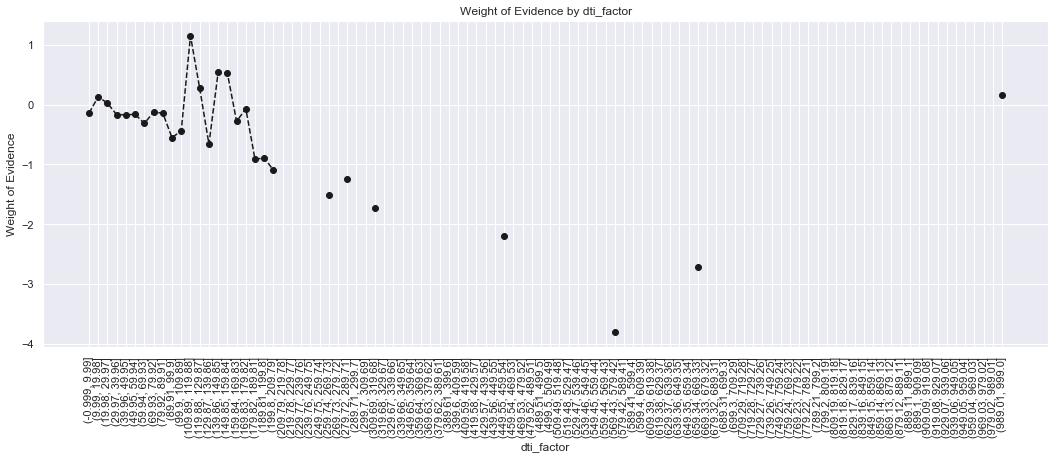

In [184]:
plot_by_woe(df_temp, 90)

In [185]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.

In [186]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [187]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


dti_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]   2125   0.929412    0.005500   1975.0  150.0     0.005223   
1      (0.7, 1.4]   2613   0.954841    0.006763   2495.0  118.0     0.006599   
2      (1.4, 2.1]   3028   0.960370    0.007837   2908.0  120.0     0.007691   
3      (2.1, 2.8]   3630   0.965840    0.009395   3506.0  124.0     0.009272   
4      (2.8, 3.5]   4197   0.971885    0.010862   4079.0  118.0     0.010788   
5      (3.5, 4.2]   4596   0.974978    0.011895   4481.0  115.0     0.011851   
6      (4.2, 4.9]   5347   0.974752    0.013839   5212.0  135.0     0.013784   
7      (4.9, 5.6]   5906   0.979851    0.015286   5787.0  119.0     0.015305   
8      (5.6, 6.3]   6547   0.975256    0.016945   6385.0  162.0     0.016886   
9      (6.3, 7.0]   7151   0.980143    0.018508   7009.0  142.0     0.018537   
10     (7.0, 7.7]   7651   0.979611    0.019802   7495.0  156.0     0.019822   
11     (7.7, 8.4]   8246   0.980960    0.021342   8089.0  157.0     0.021393   
12     (8.4, 9.1]   9081   0.978527    0.023503   8886.0  195.0     0.023501   
13     (9.1, 9.8]   9342   0.979555    0.024179   9151.0  191.0     0.024202   
14    (9.8, 10.5]  10011   0.982220    0.025910   9833.0  178.0     0.026005   
15   (10.5, 11.2]  10279   0.982099    0.026604  10095.0  184.0     0.026698   
16   (11.2, 11.9]  10499   0.980189    0.027173  10291.0  208.0     0.027217   
17   (11.9, 12.6]  11632   0.979539    0.030105  11394.0  238.0     0.030134   
18   (12.6, 13.3]  10991   0.982713    0.028446  10801.0  190.0     0.028565   
19   (13.3, 14.0]  11743   0.980499    0.030393  11514.0  229.0     0.030451   
20   (14.0, 14.7]  11817   0.981552    0.030584  11599.0  218.0     0.030676   
21   (14.7, 15.4]  11728   0.980389    0.030354  11498.0  230.0     0.030409   
22   (15.4, 16.1]  11915   0.979018    0.030838  11665.0  250.0     0.030850   
23   (16.1, 16.8]  11748   0.980082    0.030406  11514.0  234.0     0.030451   
24   (16.8, 17.5]  11855   0.982202    0.030683  11644.0  211.0     0.030795   
25   (17.5, 18.2]  11626   0.980905    0.030090  11404.0  222.0     0.030160   
26   (18.2, 18.9]  11295   0.981142    0.029233  11082.0  213.0     0.029309   
27   (18.9, 19.6]  10716   0.981896    0.027735  10522.0  194.0     0.027828   
28   (19.6, 20.3]  10703   0.979352    0.027701  10482.0  221.0     0.027722   
29   (20.3, 21.0]  10516   0.980886    0.027217  10315.0  201.0     0.027280   
30   (21.0, 21.7]   9910   0.979717    0.025649   9709.0  201.0     0.025677   
31   (21.7, 22.4]   9779   0.980571    0.025310   9589.0  190.0     0.025360   
32   (22.4, 23.1]   9023   0.980162    0.023353   8844.0  179.0     0.023390   
33   (23.1, 23.8]   8875   0.979042    0.022970   8689.0  186.0     0.022980   
34   (23.8, 24.5]   8606   0.978852    0.022274   8424.0  182.0     0.022279   
35   (24.5, 25.2]   8309   0.977735    0.021505   8124.0  185.0     0.021486   
36   (25.2, 25.9]   7731   0.977881    0.020009   7560.0  171.0     0.019994   
37   (25.9, 26.6]   7370   0.977341    0.019075   7203.0  167.0     0.019050   
38   (26.6, 27.3]   6929   0.973589    0.017933   6746.0  183.0     0.017841   
39   (27.3, 28.0]   6791   0.977617    0.017576   6639.0  152.0     0.017558   
40   (28.0, 28.7]   6258   0.976830    0.016197   6113.0  145.0     0.016167   
41   (28.7, 29.4]   5921   0.980409    0.015324   5805.0  116.0     0.015352   
42   (29.4, 30.1]   5315   0.978363    0.013756   5200.0  115.0     0.013752   
43   (30.1, 30.8]   4641   0.976945    0.012012   4534.0  107.0     0.011991   
44   (30.8, 31.5]   4291   0.975064    0.011106   4184.0  107.0     0.011065   
45   (31.5, 32.2]   4178   0.976304    0.010813   4079.0   99.0     0.010788   
46   (32.2, 32.9]   3765   0.974768    0.009744   3670.0   95.0     0.009706   
47   (32.9, 33.6]   3429   0.973170    0.008875   3337.0   92.0     0.008825   
48   (33.6, 34.3]   3547   0.974345    0.009180   3456.0   91.0     0.009140   
49   (3

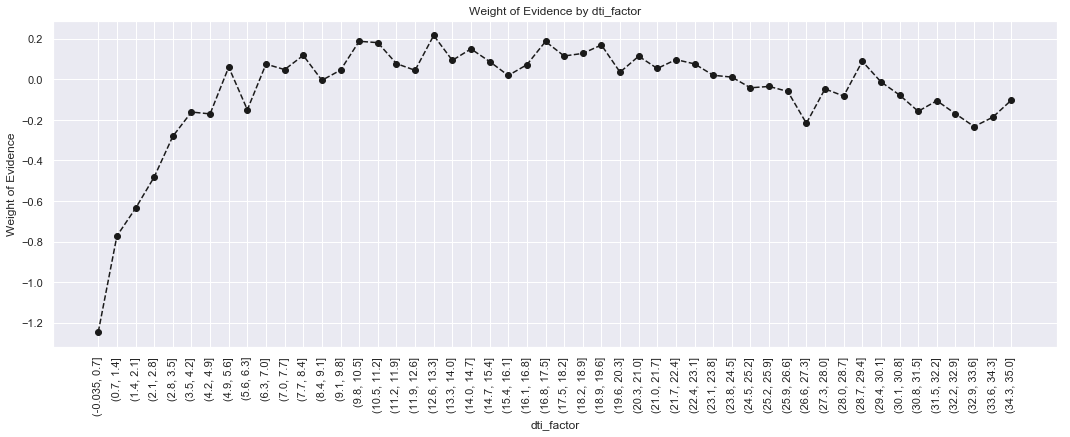

In [188]:
plot_by_woe(df_temp, 90)

In [189]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [190]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
#loan_data_temp = loan_data[np.isfinite(loan_data['mths_since_last_delinq'])]
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
#sum(loan_data_temp['mths_since_last_delinq'].isnull())
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs   n_good  \
0                 (-0.179, 3.58]   2821   0.966678    0.015345   2727.0   
1                   (3.58, 7.16]   9876   0.975901    0.053721   9638.0   
2                  (7.16, 10.74]   8188   0.973254    0.044539   7969.0   
3                 (10.74, 14.32]  11930   0.974686    0.064894  11628.0   
4                  (14.32, 17.9]   8887   0.975020    0.048341   8665.0   
5                  (17.9, 21.48]  12791   0.975295    0.069578  12475.0   
6                 (21.48, 25.06]  12123   0.977811    0.065944  11854.0   
7                 (25.06, 28.64]   9101   0.975168    0.049506   8875.0   
8                 (28.64, 32.22]  11620   0.975818    0.063208  11339.0   
9                  (32.22, 35.8]   8199   0.980363    0.044599   8038.0   
10                 (35.8, 39.38]  10700   0.977009    0.058203  10454.0   
11                (39.38, 42.96]   7901   0.976712    0.042978   7717.0   
12                (42.96, 46.54]  10773   0.979022    0.058601  10547.0   
13                (46.54, 50.12]   8515   0.979213    0.046318   8338.0   
14                 (50.12, 53.7]   5119   0.977339    0.027845   5003.0   
15                 (53.7, 57.28]   6861   0.974348    0.037321   6685.0   
16                (57.28, 60.86]   5014   0.978460    0.027274   4906.0   
17                (60.86, 64.44]   6850   0.976496    0.037261   6689.0   
18                (64.44, 68.02]   6928   0.980803    0.037685   6795.0   
19                 (68.02, 71.6]   4981   0.979321    0.027095   4878.0   
20                 (71.6, 75.18]   5917   0.979381    0.032186   5795.0   
21                (75.18, 78.76]   4060   0.982266    0.022085   3988.0   
22                (78.76, 82.34]   3877   0.982977    0.021089   3811.0   
23                (82.34, 85.92]    147   0.979592    0.000800    144.0   
24                 (85.92, 89.5]     98   0.989796    0.000533     97.0   
25                 (89.5, 93.08]     65   0.969231    0.000354     63.0   
26                (93.08, 96.66]     42   0.952381    0.000228     40.0   
27               (96.66, 100.24]     71   1.000000    0.000386     71.0   
28              (100.24, 103.82]     58   1.000000    0.000315     58.0   
29               (103.82, 107.4]     74   1.000000    0.000403     74.0   
30               (107.4, 110.98]     51   0.980392    0.000277     50.0   
31              (110.98, 114.56]     66   1.000000    0.000359     66.0   
32              (114.56, 118.14]     36   0.944444    0.000196     34.0   
33              (118.14, 121.72]     23   0.913043    0.000125     21.0   
34               (121.72, 125.3]     17   1.000000    0.000092     17.0   
35               (125.3, 128.88]      6   1.000000    0.000033      6.0   
36              (128.88, 132.46]      8   1.000000    0.000044      8.0   
37              (132.46, 136.04]     14   1.000000    0.000076     14.0   
38              (136.04, 139.62]      2   1.000000    0.000011      2.0   
39               (139.62, 143.2]      3   1.000000    0.000016      3.0   
40               (143.2, 146.78]      5   1.000000    0.000027      5.0   
41              (146.78, 150.36]      5   1.000000    0.000027      5.0   
42              (150.36, 153.94]      5   1.000000    0.000027      5.0   
43              (153.94, 157.52]      1   1.000000    0.000005      1.0   
44               (157.52, 161.1]      6   1.000000    0.000033      6.0   
45               (161.1, 164.68]      1   1.000000    0.000005      1.0   
46              (164.68, 168.26]      0        NaN    0.000000      NaN   
47              (168.26, 171.84]      1   1.000000    0.000005      1.0   
48              (171.84, 175.42]      0        NaN    0.000000      NaN   
49               (175.42, 179.0]      1   1.000000    0.000005      1.0   

    n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    94.0     0.015183    0.022217 -0.380670             NaN       NaN  inf  
1   238.0     0.05366

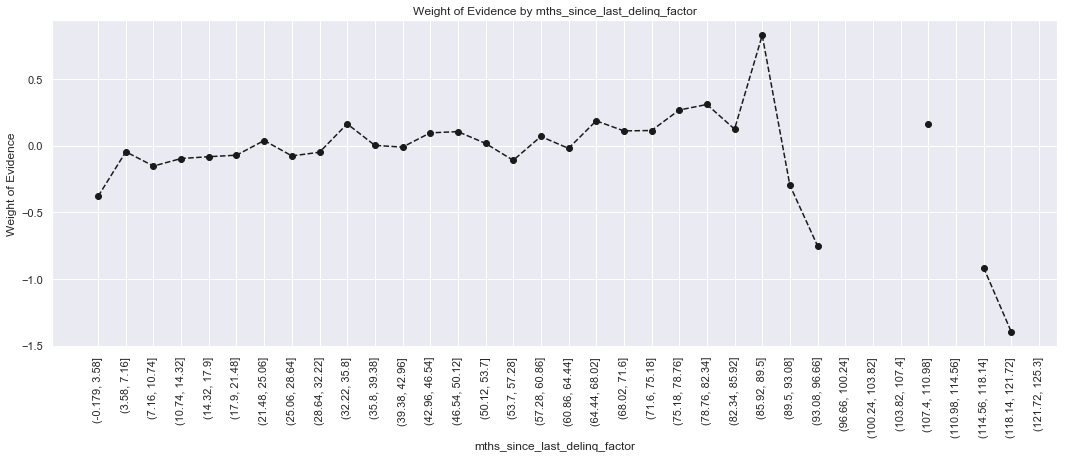

In [191]:
plot_by_woe(df_temp, 90)

In [192]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [193]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                  (0.874, 3.52]      9   1.000000    0.000174     9.0    0.0   
1                   (3.52, 6.04]     14   1.000000    0.000271    14.0    0.0   
2                   (6.04, 8.56]     37   0.945946    0.000716    35.0    2.0   
3                  (8.56, 11.08]     46   0.869565    0.000890    40.0    6.0   
4                  (11.08, 13.6]     45   1.000000    0.000871    45.0    0.0   
5                  (13.6, 16.12]     67   0.970149    0.001296    65.0    2.0   
6                 (16.12, 18.64]     54   0.962963    0.001045    52.0    2.0   
7                 (18.64, 21.16]    121   0.983471    0.002341   119.0    2.0   
8                 (21.16, 23.68]     99   0.959596    0.001915    95.0    4.0   
9                  (23.68, 26.2]    169   0.958580    0.003269   162.0    7.0   
10                 (26.2, 28.72]    137   0.978102    0.002650   134.0    3.0   
11                (28.72, 31.24]    257   0.961089    0.004972   247.0   10.0   
12                (31.24, 33.76]    235   0.961702    0.004546   226.0    9.0   
13                (33.76, 36.28]    398   0.957286    0.007700   381.0   17.0   
14                 (36.28, 38.8]    304   0.976974    0.005881   297.0    7.0   
15                 (38.8, 41.32]    481   0.975052    0.009305   469.0   12.0   
16                (41.32, 43.84]    417   0.961631    0.008067   401.0   16.0   
17                (43.84, 46.36]    666   0.966967    0.012884   644.0   22.0   
18                (46.36, 48.88]    552   0.947464    0.010679   523.0   29.0   
19                 (48.88, 51.4]    916   0.968341    0.017721   887.0   29.0   
20                 (51.4, 53.92]    623   0.972713    0.012052   606.0   17.0   
21                (53.92, 56.44]   1115   0.978475    0.021570  1091.0   24.0   
22                (56.44, 58.96]    753   0.981408    0.014567   739.0   14.0   
23                (58.96, 61.48]   1377   0.975309    0.026639  1343.0   34.0   
24                 (61.48, 64.0]   1404   0.980057    0.027161  1376.0   28.0   
25                 (64.0, 66.52]   1024   0.966797    0.019810   990.0   34.0   
26                (66.52, 69.04]   1573   0.979021    0.030431  1540.0   33.0   
27                (69.04, 71.56]   1095   0.979909    0.021184  1073.0   22.0   
28                (71.56, 74.08]   1770   0.972881    0.034242  1722.0   48.0   
29                 (74.08, 76.6]   1249   0.977582    0.024163  1221.0   28.0   
30                 (76.6, 79.12]   2129   0.977454    0.041187  2081.0   48.0   
31                (79.12, 81.64]   1494   0.975234    0.028903  1457.0   37.0   
32                (81.64, 84.16]   2411   0.972211    0.046643  2344.0   67.0   
33                (84.16, 86.68]   1681   0.968471    0.032520  1628.0   53.0   
34                 (86.68, 89.2]   2428   0.977348    0.046971  2373.0   55.0   
35                 (89.2, 91.72]   1742   0.977038    0.033700  1702.0   40.0   
36                (91.72, 94.24]   2652   0.973228    0.051305  2581.0   71.0   
37                (94.24, 96.76]   1789   0.968139    0.034610  1732.0   57.0   
38                (96.76, 99.28]   2860   0.971329    0.055329  2778.0   82.0   
39                (99.28, 101.8]   1867   0.974290    0.036118  1819.0   48.0   
40               (101.8, 104.32]   2747   0.978886    0.053143  2689.0   58.0   
41              (104.32, 106.84]   1704   0.985329    0.032965  1679.0   25.0   
42              (106.84, 109.36]   2747   0.979250    0.053143  2690.0   57.0   
43              (109.36, 111.88]   1686   0.976275    0.032617  1646.0   40.0   
44               (111.88, 114.4]   2271   0.979304    0.043934  2224.0   47.0   
45               (114.4, 116.92]   1284   0.975078    0.024840  1252.0   32.0   
46              (116.92, 119.44]   1115   0.970404    0.021570  1082.0   33.0   
47              (119.44, 121.96]     41   0.975610    0.000793    40.0    1.0   
48              (121.96, 124.48]  

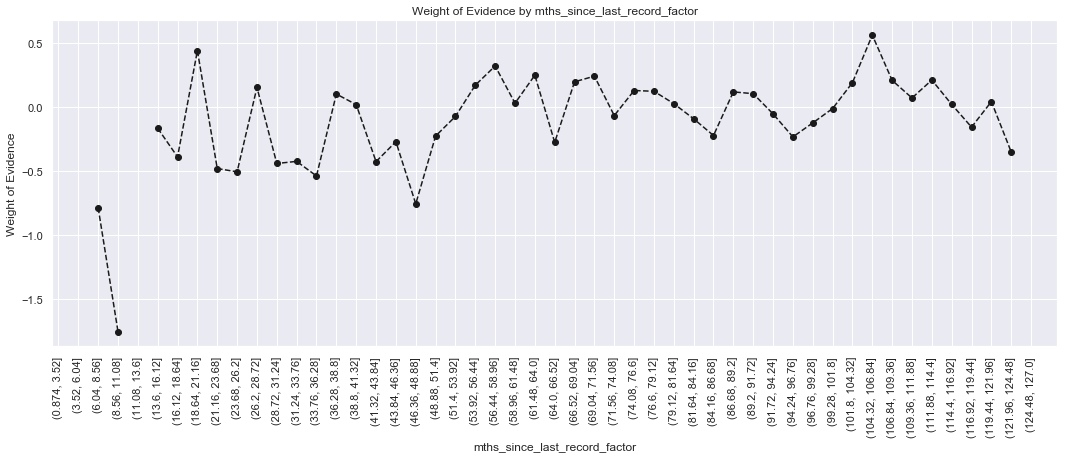

In [194]:
plot_by_woe(df_temp, 90)

In [195]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>=86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 86), 1, 0)

In [196]:
df_inputs_prepr['mths_since_last_delinq:Missing'].sum()

231898

In [197]:
# display inputs_train, inputs_test

In [198]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0      (961.0, 1780.0]   5386   0.979948    0.012955   5278.0   108.0   
1     (1780.0, 2560.0]   7413   0.980844    0.017831   7271.0   142.0   
2     (2560.0, 3340.0]   8446   0.982359    0.020316   8297.0   149.0   
3     (3340.0, 4120.0]  11053   0.979372    0.026587  10825.0   228.0   
4     (4120.0, 4900.0]   5626   0.981159    0.013533   5520.0   106.0   
5     (4900.0, 5680.0]  22385   0.979942    0.053844  21936.0   449.0   
6     (5680.0, 6460.0]  15851   0.979497    0.038128  15526.0   325.0   
7     (6460.0, 7240.0]  11985   0.981477    0.028828  11763.0   222.0   
8     (7240.0, 8020.0]  16900   0.980651    0.040651  16573.0   327.0   
9     (8020.0, 8800.0]   4168   0.978647    0.010026   4079.0    89.0   
10    (8800.0, 9580.0]   5727   0.982888    0.013776   5629.0    98.0   
11   (9580.0, 10360.0]  50852   0.979018    0.122318  49785.0  1067.0   
12  (10360.0, 11140.0]   7869   0.985640    0.018928   7756.0   113.0   
13  (11140.0, 11920.0]   2924   0.976744    0.007033   2856.0    68.0   
14  (11920.0, 12700.0]  22130   0.980479    0.053231  21698.0   432.0   
15  (12700.0, 13480.0]   6526   0.984983    0.015697   6428.0    98.0   
16  (13480.0, 14260.0]   7343   0.980526    0.017663   7200.0   143.0   
17  (14260.0, 15040.0]  28231   0.979030    0.067906  27639.0   592.0   
18  (15040.0, 15820.0]   1865   0.973190    0.004486   1815.0    50.0   
19  (15820.0, 16600.0]  14028   0.978472    0.033743  13726.0   302.0   
20  (16600.0, 17380.0]   4615   0.982232    0.011101   4533.0    82.0   
21  (17380.0, 18160.0]   9157   0.977940    0.022026   8955.0   202.0   
22  (18160.0, 18940.0]   1182   0.967851    0.002843   1144.0    38.0   
23  (18940.0, 19720.0]   3625   0.977655    0.008719   3544.0    81.0   
24  (19720.0, 20500.0]  31349   0.975948    0.075406  30595.0   754.0   
25  (20500.0, 21280.0]   4100   0.977073    0.009862   4006.0    94.0   
26  (21280.0, 22060.0]   4169   0.982250    0.010028   4095.0    74.0   
27  (22060.0, 22840.0]   1213   0.967848    0.002918   1174.0    39.0   
28  (22840.0, 23620.0]   2425   0.981856    0.005833   2381.0    44.0   
29  (23620.0, 24400.0]   8738   0.973907    0.021018   8510.0   228.0   
30  (24400.0, 25180.0]  16692   0.974359    0.040150  16264.0   428.0   
31  (25180.0, 25960.0]   1095   0.973516    0.002634   1066.0    29.0   
32  (25960.0, 26740.0]   2211   0.978290    0.005318   2163.0    48.0   
33  (26740.0, 27520.0]   2077   0.980741    0.004996   2037.0    40.0   
34  (27520.0, 28300.0]   4062   0.968242    0.009771   3933.0   129.0   
35  (28300.0, 29080.0]   1312   0.979421    0.003156   1285.0    27.0   
36  (29080.0, 29860.0]    533   0.975610    0.001282    520.0    13.0   
37  (29860.0, 30640.0]  16526   0.968171    0.039751  16000.0   526.0   
38  (30640.0, 31420.0]    868   0.976959    0.002088    848.0    20.0   
39  (31420.0, 32200.0]   4334   0.976234    0.010425   4231.0   103.0   
40  (32200.0, 32980.0]    445   0.970787    0.001070    432.0    13.0   
41  (32980.0, 33760.0]   1082   0.975970    0.002603   1056.0    26.0   
42  (33760.0, 34540.0]    752   0.980053    0.001809    737.0    15.0   
43  (34540.0, 35320.0]  14832   0.969525    0.035676  14380.0   452.0   
44  (35320.0, 36100.0]   2519   0.982930    0.006059   2476.0    43.0   
45  (36100.0, 36880.0]    259   0.976834    0.000623    253.0     6.0   
46  (36880.0, 37660.0]    529   0.984877    0.001272    521.0     8.0   
47  (37660.0, 38440.0]    726   0.988981    0.001746    718.0     8.0   
48  (38440.0, 39220.0]    380   0.984211    0.000914    374.0     6.0   
49  (39220.0, 40000.0]  17221   0.978863    0.041423  16857.0   364.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.012978    0.011936  0.083669             NaN       NaN  0.030982  
1      0.017879    0.015694  0.130319        0.000896  0.046651  0.030982  
2      0.020401    0.016468  0.214200        0.00151

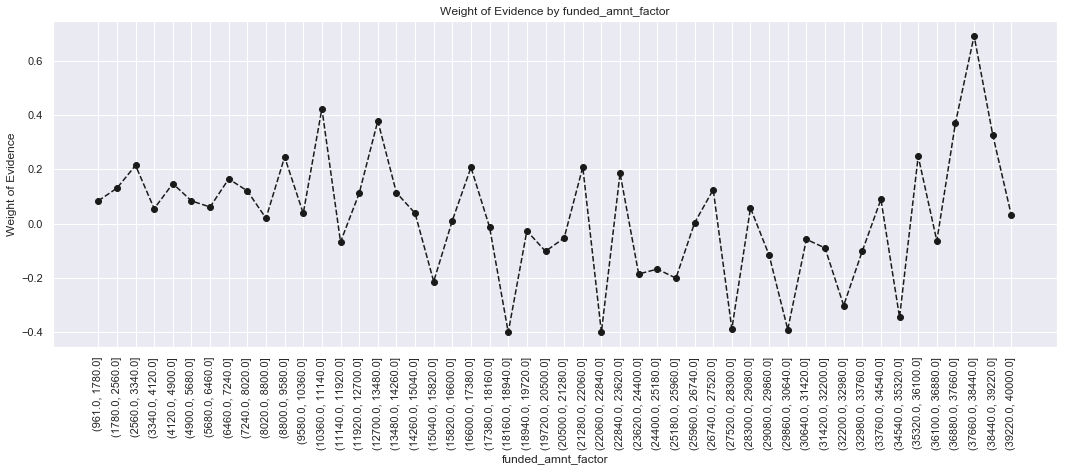

In [199]:
plot_by_woe(df_temp, 90)

In [200]:
# WON'T USE because there is no clear trend, even if segments of the whole range are considered.

In [201]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

C:\Users\kwaku\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


installment_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0        (28.48, 62.921]   6197   0.981765    0.014906   6084.0  113.0   
1       (62.921, 95.721]   8701   0.982416    0.020929   8548.0  153.0   
2      (95.721, 128.522]  12147   0.984111    0.029218  11954.0  193.0   
3     (128.522, 161.322]  15511   0.983431    0.037310  15254.0  257.0   
4     (161.322, 194.123]  22463   0.979522    0.054032  22003.0  460.0   
5     (194.123, 226.924]  19956   0.981710    0.048002  19591.0  365.0   
6     (226.924, 259.724]  22955   0.982444    0.055215  22552.0  403.0   
7     (259.724, 292.525]  21607   0.977091    0.051973  21112.0  495.0   
8     (292.525, 325.325]  31478   0.984751    0.075716  30998.0  480.0   
9     (325.325, 358.126]  28062   0.978156    0.067500  27449.0  613.0   
10    (358.126, 390.927]  22266   0.977769    0.053558  21771.0  495.0   
11    (390.927, 423.727]  14322   0.980659    0.034450  14045.0  277.0   
12    (423.727, 456.528]  12748   0.981487    0.030664  12512.0  236.0   
13    (456.528, 489.328]  19526   0.981512    0.046967  19165.0  361.0   
14    (489.328, 522.129]  14860   0.978600    0.035744  14542.0  318.0   
15     (522.129, 554.93]  13398   0.972384    0.032227  13028.0  370.0   
16      (554.93, 587.73]  10720   0.974534    0.025786  10447.0  273.0   
17     (587.73, 620.531]  12249   0.980407    0.029463  12009.0  240.0   
18    (620.531, 653.331]  11538   0.979286    0.027753  11299.0  239.0   
19    (653.331, 686.132]  10276   0.973336    0.024718  10002.0  274.0   
20    (686.132, 718.933]   8128   0.974532    0.019551   7921.0  207.0   
21    (718.933, 751.733]   6074   0.972835    0.014610   5909.0  165.0   
22    (751.733, 784.534]   9405   0.979373    0.022623   9211.0  194.0   
23    (784.534, 817.334]   7209   0.974476    0.017340   7025.0  184.0   
24    (817.334, 850.135]   5324   0.969760    0.012806   5163.0  161.0   
25    (850.135, 882.936]   6435   0.965967    0.015479   6216.0  219.0   
26    (882.936, 915.736]   5195   0.960539    0.012496   4990.0  205.0   
27    (915.736, 948.537]   5287   0.966143    0.012717   5108.0  179.0   
28    (948.537, 981.337]   3943   0.962719    0.009484   3796.0  147.0   
29   (981.337, 1014.138]   2932   0.967258    0.007053   2836.0   96.0   
30  (1014.138, 1046.939]   2176   0.966452    0.005234   2103.0   73.0   
31  (1046.939, 1079.739]   3109   0.975233    0.007478   3032.0   77.0   
32   (1079.739, 1112.54]   3233   0.970616    0.007777   3138.0   95.0   
33    (1112.54, 1145.34]   2293   0.961186    0.005516   2204.0   89.0   
34   (1145.34, 1178.141]   1858   0.967707    0.004469   1798.0   60.0   
35  (1178.141, 1210.942]   2376   0.971801    0.005715   2309.0   67.0   
36  (1210.942, 1243.742]   4394   0.983159    0.010569   4320.0   74.0   
37  (1243.742, 1276.543]   1934   0.982420    0.004652   1900.0   34.0   
38  (1276.543, 1309.343]   1768   0.973982    0.004253   1722.0   46.0   
39  (1309.343, 1342.144]    892   0.968610    0.002146    864.0   28.0   
40  (1342.144, 1374.945]    384   0.963542    0.000924    370.0   14.0   
41  (1374.945, 1407.745]    182   0.950549    0.000438    173.0    9.0   
42  (1407.745, 1440.546]    106   0.962264    0.000255    102.0    4.0   
43  (1440.546, 1473.346]     36   0.972222    0.000087     35.0    1.0   
44  (1473.346, 1506.147]     46   0.934783    0.000111     43.0    3.0   
45  (1506.147, 1538.948]     10   0.900000    0.000024      9.0    1.0   
46  (1538.948, 1571.748]      9   1.000000    0.000022      9.0    0.0   
47  (1571.748, 1604.549]     11   0.909091    0.000026     10.0    1.0   
48  (1604.549, 1637.349]      6   1.000000    0.000014      6.0    0.0   
49   (1637.349, 1670.15]      1   1.000000    0.000002      1.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.014960    0.012489  0.180527             NaN       NaN  inf  
1      0.021019    0.016910  0.217512        0.000650  0.036985  inf  
2      0.029394   

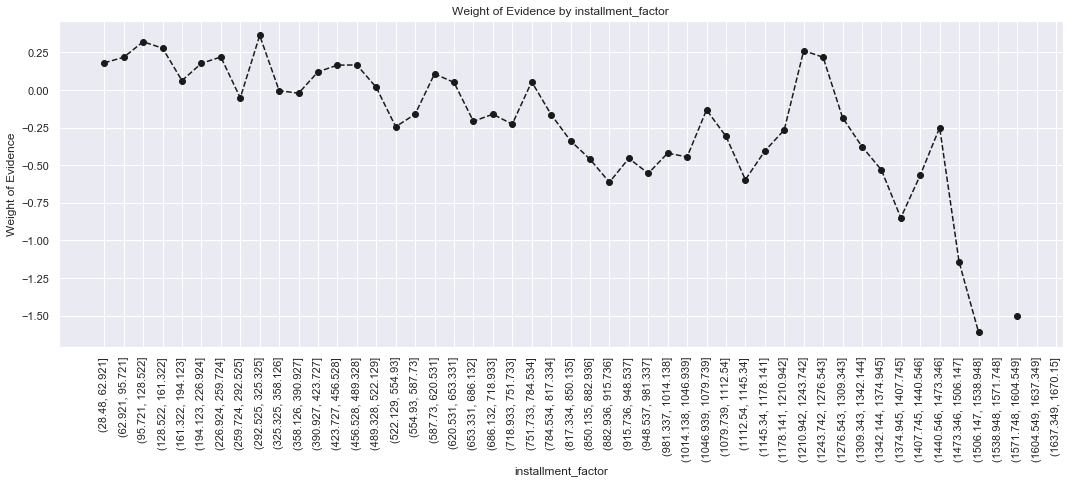

In [202]:
plot_by_woe(df_temp, 90)

In [203]:
# WON'T USE because there is no clear trend, even if segments of the whole range are considered.

### Preprocessing the test dataset

In [204]:
#####
#loan_data_inputs_train = df_inputs_prepr
#####
#loan_data_inputs_test = df_inputs_prepr
######
loan_data_inputs_2015 = df_inputs_prepr

In [205]:
loan_data_targets_2015 = df_targets_prepr

In [206]:
#loan_data_inputs_train.columns.values

In [207]:
#loan_data_inputs_test.columns.values

In [ ]:
#loan_data_inputs_train.shape

In [ ]:
#loan_data_targets_train.shape

In [ ]:
#loan_data_inputs_test.shape

In [ ]:
#loan_data_targets_test.shape

In [208]:
loan_data_inputs_2015.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [209]:
loan_data_inputs_2015.shape

(415736, 389)

In [210]:
loan_data_targets_2015.shape

(415736,)

In [211]:
#loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
#loan_data_targets_train.to_csv('loan_data_targets_train.csv')
#loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
#loan_data_targets_test.to_csv('loan_data_targets_test.csv')

In [212]:
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')


KeyboardInterrupt: 

In [213]:
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


### >>> The code up to here, from the other line starting with '>>>' is copied from the Data Preparation notebook, with minor adjustments.

***

In [214]:
inputs_train_with_ref_cat = pd.read_csv('inputs_train_with_ref_cat.csv', index_col = 0)
# We import the dataset with old data, i.e. "expected" data.

In [215]:
# From the dataframe with new, "actual" data, we keep only the relevant columns.
inputs_2015_with_ref_cat = loan_data_inputs_2015.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86',
]]

In [216]:
inputs_train_with_ref_cat.shape

(373028, 101)

In [217]:
inputs_2015_with_ref_cat.shape

(415736, 101)

In [218]:
df_scorecard = pd.read_csv('df_scorecard.csv', index_col = 0)
# We import the scorecard.

In [219]:
df_scorecard

index                                  Feature name  Coefficients  \
0        0                                     Intercept     -1.344611   
1        1                                       grade:A      1.126682   
2        2                                       grade:B      0.885124   
3        3                                       grade:C      0.690176   
4        4                                       grade:D      0.501893   
5        5                                       grade:E      0.325050   
6        6                                       grade:F      0.136361   
7        7                            home_ownership:OWN      0.093764   
8        8                       home_ownership:MORTGAGE      0.106042   
9        9                              addr_state:NM_VA      0.037102   
10      10                                 addr_state:NY      0.057653   
11      11                  addr_state:OK_TN_MO_LA_MD_NC      0.059651   
12      12                                 addr_state:CA      0.064288   
13      13                        addr_state:UT_KY_AZ_NJ      0.078897   
14      14                     addr_state:AR_MI_PA_OH_MN      0.136042   
15      15                     addr_state:RI_MA_DE_SD_IN      0.101145   
16      16                           addr_state:GA_WA_OR      0.186270   
17      17                              addr_state:WI_MT      0.239640   
18      18                                 addr_state:TX      0.223026   
19      19                              addr_state:IL_CT      0.262596   
20      20                  addr_state:KS_SC_CO_VT_AK_MS      0.321039   
21      21                  addr_state:WV_NH_WY_DC_ME_ID      0.522494   
22      22              verification_status:Not Verified      0.084732   
23      23           verification_status:Source Verified     -0.011033   
24      24                           purpose:credit_card      0.301352   
25      25                    purpose:debt_consolidation      0.197741   
26      26                    purpose:oth__med__vacation      0.213716   
27      27           purpose:major_purch__car__home_impr      0.265998   
28      28                         initial_list_status:w      0.054472   
29      29                                       term:36      0.079098   
30      30                                  emp_length:1      0.099011   
31      31                                emp_length:2-4      0.125336   
32      32                                emp_length:5-6      0.090474   
33      33                                emp_length:7-9      0.060359   
34      34                                 emp_length:10      0.124420   
35      35                        mths_since_issue_d:<38      1.085942   
36      36                      mths_since_issue_d:38-39      0.883437   
37      37                      mths_since_issue_d:40-41      0.781960   
38      38                      mths_since_issue_d:42-48      0.580991   
39      39                      mths_since_issue_d:49-52      0.419374   
40      40                      mths_since_issue_d:53-64      0.173288   
41      41                      mths_since_issue_d:65-84     -0.068098   
42      42                               int_rate:<9.548      0.883399   
43      43                         int_rate:9.548-12.025      0.555328   
44      44                         int_rate:12.025-15.74      0.303799   
45      45                         int_rate:15.74-20.281      0.111839   
46      46           mths_since_earliest_cr_line:141-164      0.025612   
47      47           mths_since_earliest_cr_line:165-247      0.045751   
48      48           mths_since_earliest_cr_line:248-270      0.053897   
49      49           mths_since_earliest_cr_line:271-352      0.120910   
..     ...                                           ...           ...   
52      52                            inq_last_6mths:1-2      0.546856   
53      53                            inq_last_6mths:3-6      0.335980   
54      5

In [220]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_train_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
427211          1        1        0        0        0        0        0   
206088          1        0        0        1        0        0        0   
136020          1        1        0        0        0        0        0   
412305          1        0        0        0        1        0        0   
36159           1        0        0        1        0        0        0   

        home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
427211                   0                        1                 0   
206088                   0                        1                 0   
136020                   0                        1                 0   
412305                   0                        0                 0   
36159                    0                        1                 0   

        addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
427211              0                             0              0   
206088              0                             0              0   
136020              0                             0              0   
412305              0                             0              0   
36159               0                             0              1   

        addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
427211                       0                          0   
206088                       1                          0   
136020                       0                          0   
412305                       0                          0   
36159                        0                          0   

        addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
427211                          0                    0                 0   
206088                          0                    0                 0   
136020                          0                    1                 0   
412305                          1                    0                 0   
36159                           0                    0                 0   

        addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
427211              0                 0                             1   
206088              0                 0                             0   
136020              0                 0                             0   
412305              0                 0                             0   
36159               0                 0                             0   

        addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
427211                             0                                 0   
206088                             0                                 1   
136020                             0                                 0   
412305                             0                                 0   
36159                              0                                 0   

        verification_status:Source Verified  purpose:credit_card  \
427211                                    1                    0   
206088                                    0                    0   
136020                                    0                    0   
412305                                    1                    0   
36159                                     0                    0   

        purpose:debt_consolidation  purpose:oth__med__vacation  \
427211                           1                           0   
206088                           1                           0   
136020                           1                           0   
412305                           1                           0   
36159                            0                           0   

        purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
427211                                    0                      0        1   
206088                   

In [221]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_train_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.
inputs_2015_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        0        0        1        0        0        0   
1          1        0        0        0        1        0        0   
2          1        0        0        0        1        0        0   
3          1        0        0        0        1        0        0   
4          1        0        0        1        0        0        0   

   home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
0                   0                        0                 0   
1                   0                        1                 0   
2                   0                        1                 0   
3                   0                        1                 0   
4                   0                        1                 0   

   addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
0              1                             0              0   
1              0                             1              0   
2              0                             0              0   
3              0                             0              0   
4              0                             1              0   

   addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
0                       0                          0   
1                       0                          0   
2                       0                          1   
3                       0                          0   
4                       0                          0   

   addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
0                          0                    0                 0   
1                          0                    0                 0   
2                          0                    0                 0   
3                          0                    1                 0   
4                          0                    0                 0   

   addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
0              0                 0                             0   
1              0                 0                             0   
2              0                 0                             0   
3              0                 0                             0   
4              0                 0                             0   

   addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
0                             0                                 1   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 1   

   verification_status:Source Verified  purpose:credit_card  \
0                                    0                    0   
1                                    1                    0   
2                                    1                    0   
3                                    1                    0   
4                                    0                    0   

   purpose:debt_consolidation  purpose:oth__med__vacation  \
0                           1                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
0                                    0                      1        1   
1                                    0                      1        0   
2                                    0                      1        1   
3                                    0                      1        1   
4                                    0                      1        0   

   

In [222]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores = scorecard_scores.values.reshape(102, 1)

# we have to ensure that the score has a shape of (102,1) in 
# order to make dot procut calculation

In [223]:
y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_train.head()

## setting the sum product (dot product)
#### so we sum product input train with ref and intercept to the score card


0
427211  685.0
206088  592.0
136020  664.0
412305  522.0
36159   522.0

In [224]:
### we will do similar thing for the score and the 2019 data set

y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores_2015.head()



### we will do similar thing for the score and the 2019 data set


# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.


0
0  628.0
1  626.0
2  606.0
3  625.0
4  608.0

In [ ]:
## the two arrays abouve contains score of the original data and the
###3 new data for monitoring

In [225]:
### Concatenate the data arrays to their respective data frame so it becomes the 
# last columns of the dataframe

inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept, y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept, y_scores_2015], axis = 1)
# Here we concatenate the scores we calculated with the rest of the variables in the two dataframes:
# the one with old ("expected") data and the one with new ("actual") data.

In [226]:
### Renaming the last colunms appropriately
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
# Here we rename the columns containing scores to "Score" in both dataframes.

In [227]:
inputs_2015_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        0        0        1        0        0        0   
1          1        0        0        0        1        0        0   
2          1        0        0        0        1        0        0   
3          1        0        0        0        1        0        0   
4          1        0        0        1        0        0        0   

   home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
0                   0                        0                 0   
1                   0                        1                 0   
2                   0                        1                 0   
3                   0                        1                 0   
4                   0                        1                 0   

   addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
0              1                             0              0   
1              0                             1              0   
2              0                             0              0   
3              0                             0              0   
4              0                             1              0   

   addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
0                       0                          0   
1                       0                          0   
2                       0                          1   
3                       0                          0   
4                       0                          0   

   addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
0                          0                    0                 0   
1                          0                    0                 0   
2                          0                    0                 0   
3                          0                    1                 0   
4                          0                    0                 0   

   addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
0              0                 0                             0   
1              0                 0                             0   
2              0                 0                             0   
3              0                 0                             0   
4              0                 0                             0   

   addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
0                             0                                 1   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 1   

   verification_status:Source Verified  purpose:credit_card  \
0                                    0                    0   
1                                    1                    0   
2                                    1                    0   
3                                    1                    0   
4                                    0                    0   

   purpose:debt_consolidation  purpose:oth__med__vacation  \
0                           1                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
0                                    0                      1        1   
1                                    0                      1        0   
2                                    0                      1        1   
3                                    0                      1        1   
4                                    0                      1        0   

   

 Since we calculate PSI in Catgorical or discrete varialbes, we need to 
    turn the Score into Dummy Variables also

 with the score range of 300 to 850 we can do a an interval of 50 scores
  like fine classification so we will end up with 11 dummy variables for score
  

In [228]:
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with old ("expected").

In [229]:
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:450-500'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800), 1, 0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] <= 850), 1, 0)
# We create dummy variables for score intervals in the dataframe with new ("actual").

# Population Stability Index: Calculation and Interpretation

To calc PSI for a single original feature, we need the proportions of 
observations per category for all its dummy variables categories

In [230]:
inputs_2015_with_ref_cat_w_intercept.head()

Intercept  grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  \
0          1        0        0        1        0        0        0   
1          1        0        0        0        1        0        0   
2          1        0        0        0        1        0        0   
3          1        0        0        0        1        0        0   
4          1        0        0        1        0        0        0   

   home_ownership:OWN  home_ownership:MORTGAGE  addr_state:NM_VA  \
0                   0                        0                 0   
1                   0                        1                 0   
2                   0                        1                 0   
3                   0                        1                 0   
4                   0                        1                 0   

   addr_state:NY  addr_state:OK_TN_MO_LA_MD_NC  addr_state:CA  \
0              1                             0              0   
1              0                             1              0   
2              0                             0              0   
3              0                             0              0   
4              0                             1              0   

   addr_state:UT_KY_AZ_NJ  addr_state:AR_MI_PA_OH_MN  \
0                       0                          0   
1                       0                          0   
2                       0                          1   
3                       0                          0   
4                       0                          0   

   addr_state:RI_MA_DE_SD_IN  addr_state:GA_WA_OR  addr_state:WI_MT  \
0                          0                    0                 0   
1                          0                    0                 0   
2                          0                    0                 0   
3                          0                    1                 0   
4                          0                    0                 0   

   addr_state:TX  addr_state:IL_CT  addr_state:KS_SC_CO_VT_AK_MS  \
0              0                 0                             0   
1              0                 0                             0   
2              0                 0                             0   
3              0                 0                             0   
4              0                 0                             0   

   addr_state:WV_NH_WY_DC_ME_ID  verification_status:Not Verified  \
0                             0                                 1   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 1   

   verification_status:Source Verified  purpose:credit_card  \
0                                    0                    0   
1                                    1                    0   
2                                    1                    0   
3                                    1                    0   
4                                    0                    0   

   purpose:debt_consolidation  purpose:oth__med__vacation  \
0                           1                           0   
1                           1                           0   
2                           1                           0   
3                           1                           0   
4                           1                           0   

   purpose:major_purch__car__home_impr  initial_list_status:w  term:36  \
0                                    0                      1        1   
1                                    0                      1        0   
2                                    0                      1        1   
3                                    0                      1        1   
4                                    0                      1        0   

   

In [231]:
# we cal the PSI for each ind var and the credit score
# however based on how a data is orgnaized we can do it all simultaneously

PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the old ("expected") data.

In [233]:
PSI_calc_train # show the prop of each varable 

Intercept                                         1.000000
grade:A                                           0.160200
grade:B                                           0.294160
grade:C                                           0.268733
grade:D                                           0.164862
grade:E                                           0.076702
grade:F                                           0.028228
home_ownership:OWN                                0.089256
home_ownership:MORTGAGE                           0.506546
addr_state:NM_VA                                  0.036032
addr_state:NY                                     0.086350
addr_state:OK_TN_MO_LA_MD_NC                      0.100475
addr_state:CA                                     0.153337
addr_state:UT_KY_AZ_NJ                            0.078742
addr_state:AR_MI_PA_OH_MN                         0.117155
addr_state:RI_MA_DE_SD_IN                         0.047128
addr_state:GA_WA_OR                               0.0674

In [234]:
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]
# We create a dataframe with proportions of observations for each dummy variable for the new ("actual") data.

PSI_calc_2015

Intercept                                         1.000000
grade:A                                           0.277498
grade:B                                           0.282547
grade:C                                           0.253978
grade:D                                           0.139095
grade:E                                           0.039037
grade:F                                           0.006446
home_ownership:OWN                                0.119802
home_ownership:MORTGAGE                           0.483477
addr_state:NM_VA                                  0.031210
addr_state:NY                                     0.080250
addr_state:OK_TN_MO_LA_MD_NC                      0.103915
addr_state:CA                                     0.135596
addr_state:UT_KY_AZ_NJ                            0.076861
addr_state:AR_MI_PA_OH_MN                         0.114339
addr_state:RI_MA_DE_SD_IN                         0.049031
addr_state:GA_WA_OR                               0.0659

In [235]:
# concatenate the two sets of data into a single dataframe
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)
# We concatenate the two dataframes along the columns.

In [236]:
PSI_calc

0           1
Intercept                                       1.000000    1.000000
grade:A                                         0.160200    0.277498
grade:B                                         0.294160    0.282547
grade:C                                         0.268733    0.253978
grade:D                                         0.164862    0.139095
grade:E                                         0.076702    0.039037
grade:F                                         0.028228    0.006446
home_ownership:OWN                              0.089256    0.119802
home_ownership:MORTGAGE                         0.506546    0.483477
addr_state:NM_VA                                0.036032    0.031210
addr_state:NY                                   0.086350    0.080250
addr_state:OK_TN_MO_LA_MD_NC                    0.100475    0.103915
addr_state:CA                                   0.153337    0.135596
addr_state:UT_KY_AZ_NJ                          0.078742    0.076861
addr_state:AR_MI_PA_OH_MN                       0.117155    0.114339
addr_state:RI_MA_DE_SD_IN                       0.047128    0.049031
addr_state:GA_WA_OR                             0.067410    0.065931
addr_state:WI_MT                                0.015664    0.015931
addr_state:TX                                   0.078166    0.082360
addr_state:IL_CT                                0.055245    0.056132
addr_state:KS_SC_CO_VT_AK_MS                    0.049168    0.053702
addr_state:WV_NH_WY_DC_ME_ID                    0.015591    0.021239
verification_status:Not Verified                0.317896    0.406313
verification_status:Source Verified             0.321772    0.398835
purpose:credit_card                             0.224061    0.263256
purpose:debt_consolidation                      0.587578    0.526457
purpose:oth__med__vacation                      0.065837    0.087091
purpose:major_purch__car__home_impr             0.089538    0.097540
initial_list_status:w                           0.349877    0.871637
term:36                                         0.724929    0.695126
emp_length:1                                    0.063411    0.067175
emp_length:2-4                                  0.227197    0.233951
emp_length:5-6                                  0.121945    0.106654
emp_length:7-9                                  0.142534    0.093482
emp_length:10                                   0.322348    0.322577
mths_since_issue_d:<38                          0.075517    1.000000
mths_since_issue_d:38-39                        0.106255    0.000000
mths_since_issue_d:40-41                        0.103515    0.000000
mths_since_issue_d:42-48                        0.252048    0.000000
mths_since_issue_d:49-52                        0.116905    0.000000
mths_since_issue_d:53-64                        0.204639    0.000000
mths_since_issue_d:65-84                        0.099253    0.000000
int_rate:<9.548                                 0.179909    0.291517
int_rate:9.548-12.025                           0.168111    0.225763
int_rate:12.025-15.74                           0.348877    0.223615
int_rate:15.74-20.281                           0.224182    0.166055
mths_since_earliest_cr_line:141-164             0.063893    0.160123
mths_since_earliest_cr_line:165-247             0.414317    0.338696
mths_since_earliest_cr_line:248-270             0.106064    0.051439
mths_since_earliest_cr_line:271-352             0.238548    0.111621
...                                                  ...         ...
annual_inc:120K-140K                            0.036791    0.046797
annual_inc:>140K                                0.058886    0.089966
dti:<=1.4                                       0.008123    0.011397
dti:1.4-3.5                                     0.020682    0.026110
dti:3.5-7.7                                     0.089865    0.089836
dti:7.7-10.5                                    0.096274    0.087868
dti:10.5-16.1                                   0.249

In [237]:
PSI_calc = PSI_calc.reset_index()
# We reset the index of the dataframe. The index becomes from 0 to the total number of rows less one.


In [238]:
PSI_calc

index           0           1
0                                       Intercept    1.000000    1.000000
1                                         grade:A    0.160200    0.277498
2                                         grade:B    0.294160    0.282547
3                                         grade:C    0.268733    0.253978
4                                         grade:D    0.164862    0.139095
5                                         grade:E    0.076702    0.039037
6                                         grade:F    0.028228    0.006446
7                              home_ownership:OWN    0.089256    0.119802
8                         home_ownership:MORTGAGE    0.506546    0.483477
9                                addr_state:NM_VA    0.036032    0.031210
10                                  addr_state:NY    0.086350    0.080250
11                   addr_state:OK_TN_MO_LA_MD_NC    0.100475    0.103915
12                                  addr_state:CA    0.153337    0.135596
13                         addr_state:UT_KY_AZ_NJ    0.078742    0.076861
14                      addr_state:AR_MI_PA_OH_MN    0.117155    0.114339
15                      addr_state:RI_MA_DE_SD_IN    0.047128    0.049031
16                            addr_state:GA_WA_OR    0.067410    0.065931
17                               addr_state:WI_MT    0.015664    0.015931
18                                  addr_state:TX    0.078166    0.082360
19                               addr_state:IL_CT    0.055245    0.056132
20                   addr_state:KS_SC_CO_VT_AK_MS    0.049168    0.053702
21                   addr_state:WV_NH_WY_DC_ME_ID    0.015591    0.021239
22               verification_status:Not Verified    0.317896    0.406313
23            verification_status:Source Verified    0.321772    0.398835
24                            purpose:credit_card    0.224061    0.263256
25                     purpose:debt_consolidation    0.587578    0.526457
26                     purpose:oth__med__vacation    0.065837    0.087091
27            purpose:major_purch__car__home_impr    0.089538    0.097540
28                          initial_list_status:w    0.349877    0.871637
29                                        term:36    0.724929    0.695126
30                                   emp_length:1    0.063411    0.067175
31                                 emp_length:2-4    0.227197    0.233951
32                                 emp_length:5-6    0.121945    0.106654
33                                 emp_length:7-9    0.142534    0.093482
34                                  emp_length:10    0.322348    0.322577
35                         mths_since_issue_d:<38    0.075517    1.000000
36                       mths_since_issue_d:38-39    0.106255    0.000000
37                       mths_since_issue_d:40-41    0.103515    0.000000
38                       mths_since_issue_d:42-48    0.252048    0.000000
39                       mths_since_issue_d:49-52    0.116905    0.000000
40                       mths_since_issue_d:53-64    0.204639    0.000000
41                       mths_since_issue_d:65-84    0.099253    0.000000
42                                int_rate:<9.548    0.179909    0.291517
43                          int_rate:9.548-12.025    0.168111    0.225763
44                          int_rate:12.025-15.74    0.348877    0.223615
45                          int_rate:15.74-20.281    0.224182    0.166055
46            mths_since_earliest_cr_line:141-164    0.063893    0.160123
47            mths_since_earliest_cr_line:165-247    0.414317    0.338696
48            mths_since_earliest_cr_line:248-270    0.106064    0.051439
49            mths_since_earliest_cr_line:271-352    0.238548    0.111621
..                                            ...         ...         ...
64                           annual_inc:120K-140K    0.036791    0.046797
65                               annual_inc:>140K    0.058886    0.089966
66                                      dti:<=1.

in order to calc PSI, we need to sum the categorical variable for each 
feature

In [241]:
# The old index, which is the dummy variable name, becomes a column, named 'index'.
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]

# the col will retunr the name of the origianl valriable


In [242]:
PSI_calc

index           0           1  \
0                                       Intercept    1.000000    1.000000   
1                                         grade:A    0.160200    0.277498   
2                                         grade:B    0.294160    0.282547   
3                                         grade:C    0.268733    0.253978   
4                                         grade:D    0.164862    0.139095   
5                                         grade:E    0.076702    0.039037   
6                                         grade:F    0.028228    0.006446   
7                              home_ownership:OWN    0.089256    0.119802   
8                         home_ownership:MORTGAGE    0.506546    0.483477   
9                                addr_state:NM_VA    0.036032    0.031210   
10                                  addr_state:NY    0.086350    0.080250   
11                   addr_state:OK_TN_MO_LA_MD_NC    0.100475    0.103915   
12                                  addr_state:CA    0.153337    0.135596   
13                         addr_state:UT_KY_AZ_NJ    0.078742    0.076861   
14                      addr_state:AR_MI_PA_OH_MN    0.117155    0.114339   
15                      addr_state:RI_MA_DE_SD_IN    0.047128    0.049031   
16                            addr_state:GA_WA_OR    0.067410    0.065931   
17                               addr_state:WI_MT    0.015664    0.015931   
18                                  addr_state:TX    0.078166    0.082360   
19                               addr_state:IL_CT    0.055245    0.056132   
20                   addr_state:KS_SC_CO_VT_AK_MS    0.049168    0.053702   
21                   addr_state:WV_NH_WY_DC_ME_ID    0.015591    0.021239   
22               verification_status:Not Verified    0.317896    0.406313   
23            verification_status:Source Verified    0.321772    0.398835   
24                            purpose:credit_card    0.224061    0.263256   
25                     purpose:debt_consolidation    0.587578    0.526457   
26                     purpose:oth__med__vacation    0.065837    0.087091   
27            purpose:major_purch__car__home_impr    0.089538    0.097540   
28                          initial_list_status:w    0.349877    0.871637   
29                                        term:36    0.724929    0.695126   
30                                   emp_length:1    0.063411    0.067175   
31                                 emp_length:2-4    0.227197    0.233951   
32                                 emp_length:5-6    0.121945    0.106654   
33                                 emp_length:7-9    0.142534    0.093482   
34                                  emp_length:10    0.322348    0.322577   
35                         mths_since_issue_d:<38    0.075517    1.000000   
36                       mths_since_issue_d:38-39    0.106255    0.000000   
37                       mths_since_issue_d:40-41    0.103515    0.000000   
38                       mths_since_issue_d:42-48    0.252048    0.000000   
39                       mths_since_issue_d:49-52    0.116905    0.000000   
40                       mths_since_issue_d:53-64    0.204639    0.000000   
41                       mths_since_issue_d:65-84    0.099253    0.000000   
42                                int_rate:<9.548    0.179909    0.291517   
43                          int_rate:9.548-12.025    0.168111    0.225763   
44                          int_rate:12.025-15.74    0.348877    0.223615   
45                          int_rate:15.74-20.281    0.224182    0.166055   
46            mths_since_earliest_cr_line:141-164    0.063893    0.160123   
47            mths_since_earliest_cr_line:165-247    0.414317    0.338696   
48            mths_since_earliest_cr_line:248-270    0.106064    0.051439   
49            mths_since_earliest_cr_line:271-352    0.238548    0.111621   
..                                            ...         ...         ...   
64                           annual_inc:

In [243]:
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']
# We change the names of the columns of the dataframe.

In [244]:
PSI_calc

index  Proportions_Train  \
0                                       Intercept           1.000000   
1                                         grade:A           0.160200   
2                                         grade:B           0.294160   
3                                         grade:C           0.268733   
4                                         grade:D           0.164862   
5                                         grade:E           0.076702   
6                                         grade:F           0.028228   
7                              home_ownership:OWN           0.089256   
8                         home_ownership:MORTGAGE           0.506546   
9                                addr_state:NM_VA           0.036032   
10                                  addr_state:NY           0.086350   
11                   addr_state:OK_TN_MO_LA_MD_NC           0.100475   
12                                  addr_state:CA           0.153337   
13                         addr_state:UT_KY_AZ_NJ           0.078742   
14                      addr_state:AR_MI_PA_OH_MN           0.117155   
15                      addr_state:RI_MA_DE_SD_IN           0.047128   
16                            addr_state:GA_WA_OR           0.067410   
17                               addr_state:WI_MT           0.015664   
18                                  addr_state:TX           0.078166   
19                               addr_state:IL_CT           0.055245   
20                   addr_state:KS_SC_CO_VT_AK_MS           0.049168   
21                   addr_state:WV_NH_WY_DC_ME_ID           0.015591   
22               verification_status:Not Verified           0.317896   
23            verification_status:Source Verified           0.321772   
24                            purpose:credit_card           0.224061   
25                     purpose:debt_consolidation           0.587578   
26                     purpose:oth__med__vacation           0.065837   
27            purpose:major_purch__car__home_impr           0.089538   
28                          initial_list_status:w           0.349877   
29                                        term:36           0.724929   
30                                   emp_length:1           0.063411   
31                                 emp_length:2-4           0.227197   
32                                 emp_length:5-6           0.121945   
33                                 emp_length:7-9           0.142534   
34                                  emp_length:10           0.322348   
35                         mths_since_issue_d:<38           0.075517   
36                       mths_since_issue_d:38-39           0.106255   
37                       mths_since_issue_d:40-41           0.103515   
38                       mths_since_issue_d:42-48           0.252048   
39                       mths_since_issue_d:49-52           0.116905   
40                       mths_since_issue_d:53-64           0.204639   
41                       mths_since_issue_d:65-84           0.099253   
42                                int_rate:<9.548           0.179909   
43                          int_rate:9.548-12.025           0.168111   
44                          int_rate:12.025-15.74           0.348877   
45                          int_rate:15.74-20.281           0.224182   
46            mths_since_earliest_cr_line:141-164           0.063893   
47            mths_since_earliest_cr_line:165-247           0.414317   
48            mths_since_earliest_cr_line:248-270           0.106064   
49            mths_since_earliest_cr_line:271-352           0.238548   
..                                            ...                ...   
64                           annual_inc:120K-140K           0.036791   
65                               annual_inc:>140K           0.058886   
66                                      dti:<=1.4           0.008123   
67                                    dti:1.4-3.5           0.020682   
68          

In [245]:
#re order the table
PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]

In [246]:
PSI_calc

index  \
0                                       Intercept   
1                                         grade:A   
2                                         grade:B   
3                                         grade:C   
4                                         grade:D   
5                                         grade:E   
6                                         grade:F   
7                              home_ownership:OWN   
8                         home_ownership:MORTGAGE   
9                                addr_state:NM_VA   
10                                  addr_state:NY   
11                   addr_state:OK_TN_MO_LA_MD_NC   
12                                  addr_state:CA   
13                         addr_state:UT_KY_AZ_NJ   
14                      addr_state:AR_MI_PA_OH_MN   
15                      addr_state:RI_MA_DE_SD_IN   
16                            addr_state:GA_WA_OR   
17                               addr_state:WI_MT   
18                                  addr_state:TX   
19                               addr_state:IL_CT   
20                   addr_state:KS_SC_CO_VT_AK_MS   
21                   addr_state:WV_NH_WY_DC_ME_ID   
22               verification_status:Not Verified   
23            verification_status:Source Verified   
24                            purpose:credit_card   
25                     purpose:debt_consolidation   
26                     purpose:oth__med__vacation   
27            purpose:major_purch__car__home_impr   
28                          initial_list_status:w   
29                                        term:36   
30                                   emp_length:1   
31                                 emp_length:2-4   
32                                 emp_length:5-6   
33                                 emp_length:7-9   
34                                  emp_length:10   
35                         mths_since_issue_d:<38   
36                       mths_since_issue_d:38-39   
37                       mths_since_issue_d:40-41   
38                       mths_since_issue_d:42-48   
39                       mths_since_issue_d:49-52   
40                       mths_since_issue_d:53-64   
41                       mths_since_issue_d:65-84   
42                                int_rate:<9.548   
43                          int_rate:9.548-12.025   
44                          int_rate:12.025-15.74   
45                          int_rate:15.74-20.281   
46            mths_since_earliest_cr_line:141-164   
47            mths_since_earliest_cr_line:165-247   
48            mths_since_earliest_cr_line:248-270   
49            mths_since_earliest_cr_line:271-352   
..                                            ...   
64                           annual_inc:120K-140K   
65                               annual_inc:>140K   
66                                      dti:<=1.4   
67                                    dti:1.4-3.5   
68                                    dti:3.5-7.7   
69                                   dti:7.7-10.5   
70                                  dti:10.5-16.1   
71                                  dti:16.1-20.3   
72                                  dti:20.3-21.7   
73                                  dti:21.7-22.4   
74                                    dti:22.4-35   
75                 mths_since_last_delinq:Missing   
76                    mths_since_last_delinq:4-30   
77                   mths_since_last_delinq:31-56   
78                    mths_since_last_delinq:>=57   
79                 mths_since_last_record:Missing   
80                    mths_since_last_record:3-20   
81                   mths_since_last_record:21-31   
82                   mths_since_last_record:32-80   
83                   mths_since_last_record:81-86   
84                    mths_since_last_record:>=86   
85                                        grade:G   
86             home_ownership:RENT_OTHER_NONE_ANY   
87                addr_state:ND_NE_IA_NV_FL_HI_AL   
88              

In [247]:
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]
# We remove the rows with values in the 'index' column 'Intercept' and 'Score'.
#over rides them and leave then out

PSI_calc

index  \
1                                         grade:A   
2                                         grade:B   
3                                         grade:C   
4                                         grade:D   
5                                         grade:E   
6                                         grade:F   
7                              home_ownership:OWN   
8                         home_ownership:MORTGAGE   
9                                addr_state:NM_VA   
10                                  addr_state:NY   
11                   addr_state:OK_TN_MO_LA_MD_NC   
12                                  addr_state:CA   
13                         addr_state:UT_KY_AZ_NJ   
14                      addr_state:AR_MI_PA_OH_MN   
15                      addr_state:RI_MA_DE_SD_IN   
16                            addr_state:GA_WA_OR   
17                               addr_state:WI_MT   
18                                  addr_state:TX   
19                               addr_state:IL_CT   
20                   addr_state:KS_SC_CO_VT_AK_MS   
21                   addr_state:WV_NH_WY_DC_ME_ID   
22               verification_status:Not Verified   
23            verification_status:Source Verified   
24                            purpose:credit_card   
25                     purpose:debt_consolidation   
26                     purpose:oth__med__vacation   
27            purpose:major_purch__car__home_impr   
28                          initial_list_status:w   
29                                        term:36   
30                                   emp_length:1   
31                                 emp_length:2-4   
32                                 emp_length:5-6   
33                                 emp_length:7-9   
34                                  emp_length:10   
35                         mths_since_issue_d:<38   
36                       mths_since_issue_d:38-39   
37                       mths_since_issue_d:40-41   
38                       mths_since_issue_d:42-48   
39                       mths_since_issue_d:49-52   
40                       mths_since_issue_d:53-64   
41                       mths_since_issue_d:65-84   
42                                int_rate:<9.548   
43                          int_rate:9.548-12.025   
44                          int_rate:12.025-15.74   
45                          int_rate:15.74-20.281   
46            mths_since_earliest_cr_line:141-164   
47            mths_since_earliest_cr_line:165-247   
48            mths_since_earliest_cr_line:248-270   
49            mths_since_earliest_cr_line:271-352   
50               mths_since_earliest_cr_line:>352   
..                                            ...   
63                           annual_inc:100K-120K   
64                           annual_inc:120K-140K   
65                               annual_inc:>140K   
66                                      dti:<=1.4   
67                                    dti:1.4-3.5   
68                                    dti:3.5-7.7   
69                                   dti:7.7-10.5   
70                                  dti:10.5-16.1   
71                                  dti:16.1-20.3   
72                                  dti:20.3-21.7   
73                                  dti:21.7-22.4   
74                                    dti:22.4-35   
75                 mths_since_last_delinq:Missing   
76                    mths_since_last_delinq:4-30   
77                   mths_since_last_delinq:31-56   
78                    mths_since_last_delinq:>=57   
79                 mths_since_last_record:Missing   
80                    mths_since_last_record:3-20   
81                   mths_since_last_record:21-31   
82                   mths_since_last_record:32-80   
83                   mths_since_last_record:81-86   
84                    mths_since_last_record:>=86   
85                                        grade:G   
86             home_ownership:RENT_OTHER_NONE_ANY   
87              

In [248]:
#Calculating PSI for all features at ones

PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0, (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# We calculate the contribution of each dummy variable to the PSI of each original variable it comes from.
# If either the proportion of old data or the proportion of new data are 0, the contribution is 0.
# Otherwise, we apply the PSI formula for each contribution.

C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kwaku\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [249]:
PSI_calc

index  \
1                                         grade:A   
2                                         grade:B   
3                                         grade:C   
4                                         grade:D   
5                                         grade:E   
6                                         grade:F   
7                              home_ownership:OWN   
8                         home_ownership:MORTGAGE   
9                                addr_state:NM_VA   
10                                  addr_state:NY   
11                   addr_state:OK_TN_MO_LA_MD_NC   
12                                  addr_state:CA   
13                         addr_state:UT_KY_AZ_NJ   
14                      addr_state:AR_MI_PA_OH_MN   
15                      addr_state:RI_MA_DE_SD_IN   
16                            addr_state:GA_WA_OR   
17                               addr_state:WI_MT   
18                                  addr_state:TX   
19                               addr_state:IL_CT   
20                   addr_state:KS_SC_CO_VT_AK_MS   
21                   addr_state:WV_NH_WY_DC_ME_ID   
22               verification_status:Not Verified   
23            verification_status:Source Verified   
24                            purpose:credit_card   
25                     purpose:debt_consolidation   
26                     purpose:oth__med__vacation   
27            purpose:major_purch__car__home_impr   
28                          initial_list_status:w   
29                                        term:36   
30                                   emp_length:1   
31                                 emp_length:2-4   
32                                 emp_length:5-6   
33                                 emp_length:7-9   
34                                  emp_length:10   
35                         mths_since_issue_d:<38   
36                       mths_since_issue_d:38-39   
37                       mths_since_issue_d:40-41   
38                       mths_since_issue_d:42-48   
39                       mths_since_issue_d:49-52   
40                       mths_since_issue_d:53-64   
41                       mths_since_issue_d:65-84   
42                                int_rate:<9.548   
43                          int_rate:9.548-12.025   
44                          int_rate:12.025-15.74   
45                          int_rate:15.74-20.281   
46            mths_since_earliest_cr_line:141-164   
47            mths_since_earliest_cr_line:165-247   
48            mths_since_earliest_cr_line:248-270   
49            mths_since_earliest_cr_line:271-352   
50               mths_since_earliest_cr_line:>352   
..                                            ...   
63                           annual_inc:100K-120K   
64                           annual_inc:120K-140K   
65                               annual_inc:>140K   
66                                      dti:<=1.4   
67                                    dti:1.4-3.5   
68                                    dti:3.5-7.7   
69                                   dti:7.7-10.5   
70                                  dti:10.5-16.1   
71                                  dti:16.1-20.3   
72                                  dti:20.3-21.7   
73                                  dti:21.7-22.4   
74                                    dti:22.4-35   
75                 mths_since_last_delinq:Missing   
76                    mths_since_last_delinq:4-30   
77                   mths_since_last_delinq:31-56   
78                    mths_since_last_delinq:>=57   
79                 mths_since_last_record:Missing   
80                    mths_since_last_record:3-20   
81                   mths_since_last_record:21-31   
82                   mths_since_last_record:32-80   
83                   mths_since_last_record:81-86   
84                    mths_since_last_record:>=86   
85                                        grade:G   
86             home_ownership:RENT_OTHER_NONE_ANY   
87              

In [250]:
PSI_calc.groupby('Original feature name')['Contribution'].sum()
# Finally, we sum all contributions for each original independent variable and the 'Score' variable.

Original feature name
Score                          1.374955
acc_now_delinq                 0.000013
addr_state                     0.007877
annual_inc                     0.030790
dti                            0.144547
emp_length                     0.042596
grade                          0.137035
home_ownership                 0.010206
initial_list_status            1.322710
inq_last_6mths                 0.144911
int_rate                       0.146355
mths_since_earliest_cr_line    0.781411
mths_since_issue_d             2.388305
mths_since_last_delinq         0.010301
mths_since_last_record         0.035126
purpose                        0.021506
term                           0.004317
verification_status            0.139978
Name: Contribution, dtype: float64

#### Interpretation

In [ ]:
PSI = 0: No difference btn two data

PSI<0.1 = Little to no difference

0.1<psi<0.25 : PSI little diff (no action )

PSI >0.25 : big difence , re-build model

PSI = Absolute Difference, rebuild model -

dti                            0.144547

initial_list_status            1.322710

mths_since_issue_d             2.388305

In [ ]:
#### How the two popoulations are distributed with respect to  
#### the dependent variables

Since PSI FOR SORE is 1.3, then we need to review the model again

Hence there is a huge difference btn the populations w rt to 
moedel outcome by, three of the model categories and the outcome of the probablility 